## Практическая работа

В этой работе вам нужно будет подготовить финальный нотбук по задаче предсказания стоимости поддержанного автомобиля, которую мы решали на протяжении нескольких модулей. 
<br>
*Обязательные задачи* помогут проверить, что вы действительно усвоили материал. Если у вас всё получилось, можете переходить к следующей теме.
<br>
Удачи!

Цели практической работы: 

1.   Потренироваться в формировании понятного и структурированного ноутбука по результатам исследования.
2.   Отработать выбор наилучшей предсказательной модели с помощью кросс-валидации. 
3.   На основе результатов метрик научиться делать выводы о переобучении/недообучении модели.
4.   Научиться сохранять обученные модели в формате `pickle`.




Что оценивается:

*   Ноутбук состоит из блоков: каждый блок соответствует определённой фазе работы с задачей.
*   Блоки, которые состоят из нескольких этапов, декомпозированы на подблоки (например, в `Data Preparation` может быть несколько подблоков: `Data cleaning`, `Feature Selection` и тому подобное).
*   Код написан в едином стиле и не нарушает PEP-8.
*   Код покрыт комментариями.
*   Код воспроизводим (то есть проверяющий, запустив ноутбук, получит ровно такие же результаты).
*   Все условия задач выполнены.





## Обязательные задачи

### Постановка общей задачи:



Напомним, что вы работаете с небольшой выборкой из коллекции подержанных автомобилей, выставленных на продажу в Соединённых Штатах. На этих данных вам нужно построить модель классификации, определяющую категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства.

### Описание датасета:



- `id`: идентификатор записи;
- `url`: URL записи о продаже;
- `region`: регион;
- `region_url`: URL региона;
- `price`: стоимость;
- `year`: год выпуска;
- `manufacturer`: производитель;
- `model`: модель;
- `condition`: состояние;
- `cylinders`: количество цилиндров;
- `fuel`: тип топлива;
- `odometer`: количество пройденных миль;
- `title_status`: статус;
- `transmission`: коробка передач;
- `VIN`: идентификационный номер;
- `drive`: тип привода;
- `size`: размер;
- `type`: кузов;
- `paint_color`: цвет;
- `image_url`: URL изображения;
- `description`: указанное описание;
- `county`: страна;
- `state`: штат;
- `lat`: широта;
- `long`: долгота;
- `posting_date`: дата размещения объявления о продаже;
- `price_category`: категория цены.

###  Задачи:

Ниже представлены задачи по проекту построения модели. Выполните их и в отдельном файле соберите финальный ноутбук проекта. 

## 0. *Импорт сторонних библиотек*

В первой ячейке ноутбука импортируйте библиотеки, которые необходимы для работы с данными. Впоследствии все импорты добавляйте в эту ячейку. Структурируйте их по PEP-8. 

[Документация по оформлению import'ов (PEP-8)](https://peps.python.org/pep-0008/#imports)

In [330]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy. stats import pearsonr
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score

## 1. *Загрузка данных*

Загрузите данные из файла `df_out`. Выведите размерность и первые 5 строчек данных.

In [331]:
# Загрузим датасет выведем первые 5 строк
df = pd.read_csv('data/df_out.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


## 2. *Data Preparation*

Объявите блок Data Preparation. В этом блоке:
* произведите преобразование типов данных, если нужно;
* исследуйте данные на пропуски, обработайте их (например, заполните какими-то значениями);
* избавьтесь от аномалий, если нужно.

В решении данной задачи опирайтесь на результаты работы в 17-19 модулях блока Data Preparation. Исследование данных подкрепляйте соответствующей визуализацией в виде графиков, таблиц или статистических значений.

Декомпозируйте блок на подблоки.


### Data type conversion
#### [Pandas data types my cheat sheet](https://dfedorov.spb.ru/pandas/%D0%9E%D0%B1%D0%B7%D0%BE%D1%80%20%D1%82%D0%B8%D0%BF%D0%BE%D0%B2%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20pandas.html)

In [332]:
df.shape

(10000, 20)

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   url             10000 non-null  object 
 2   region          10000 non-null  object 
 3   region_url      10000 non-null  object 
 4   price           10000 non-null  int64  
 5   year            9964 non-null   float64
 6   manufacturer    10000 non-null  object 
 7   model           9872 non-null   object 
 8   fuel            9937 non-null   object 
 9   odometer        10000 non-null  int64  
 10  title_status    9834 non-null   object 
 11  transmission    9955 non-null   object 
 12  image_url       9998 non-null   object 
 13  description     9998 non-null   object 
 14  state           10000 non-null  object 
 15  lat             9902 non-null   float64
 16  long            9902 non-null   float64
 17  posting_date    9998 non-null   

####

---

*date            9998 non-null, две строки с пропусками, найдем и проанализируем эти строки*

---

In [334]:
df[df.date.isnull()] # выведем для анализа строки с пропущенной датой

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
6728,7315259025,https://nh.craigslist.org/cto/d/manchester-201...,new hampshire,https://nh.craigslist.org,3750,NaN,other,NaN,NaN,95674,NaN,NaN,NaN,NaN,nh,NaN,NaN,NaN,low,NaN
9388,7208549803,https://bellingham.craigslist.org/ctd/d/bellin...,bellingham,https://bellingham.craigslist.org,11999,NaN,other,NaN,NaN,95674,NaN,NaN,NaN,NaN,wa,NaN,NaN,NaN,medium,NaN


---

можно их удалить и сохранить в новый датафрейм df_without_nan

---

In [335]:
df_without_nan = df.dropna(subset = ['date']).copy()

In [336]:
df_without_nan.shape

(9998, 20)

In [337]:
# ПРиведем 'date' в datetime64
df_without_nan['date'] = pd.to_datetime(df_without_nan.date, dayfirst=True)

In [338]:
df_without_nan.date.dtypes

datetime64[ns, UTC]

In [339]:
# ПРиведем 'posting_date' в datetime64
pd.to_datetime(df_without_nan.posting_date, utc=True)

0      2021-04-17 16:30:50+00:00
1      2021-05-03 19:40:21+00:00
2      2021-04-28 10:52:20+00:00
3      2021-04-17 14:08:57+00:00
4      2021-05-03 22:32:06+00:00
                  ...           
9995   2021-04-10 20:33:57+00:00
9996   2021-05-03 13:36:30+00:00
9997   2021-04-22 19:14:01+00:00
9998   2021-04-14 14:14:42+00:00
9999   2021-04-24 17:50:49+00:00
Name: posting_date, Length: 9998, dtype: datetime64[ns, UTC]

####

---

*'year' - выведем строки с пропущенными значениями и проанализируем*


---

In [340]:
df_without_nan[df_without_nan.year.isnull()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
344,7304102133,https://wenatchee.craigslist.org/ctd/d/wenatch...,wenatchee,https://wenatchee.craigslist.org,35880,NaN,other,500,gas,13508,clean,automatic,https://images.craigslist.org/00J0J_6IMoEUzIIM...,2019 *Ram* *1500* Big Horn/Lone Star 4x2 Quad ...,wa,47.434493,-120.320759,2021-04-09T06:31:03-0700,high,2021-04-09 13:31:03+00:00
420,7316337069,https://lasvegas.craigslist.org/ctd/d/scottsda...,las vegas,https://lasvegas.craigslist.org,84995,NaN,other,Super Duty F-350 SRW,diesel,1268,clean,automatic,https://images.craigslist.org/00x0x_iQCC0Ef28S...,2020 *Ford* *Super Duty F-350 SRW* 1K MILES. B...,nv,33.458277,-111.925970,2021-05-03T11:31:39-0700,high,2021-05-03 18:31:39+00:00
425,7315662117,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,43900,NaN,other,Grand Caravan,NaN,21,clean,automatic,https://images.craigslist.org/00f0f_7AwipNocNH...,"2019 *Dodge* *Grand Caravan* SE - $43,900Call ...",co,39.674406,-104.998604,2021-05-02T01:11:33-0600,high,2021-05-02 07:11:33+00:00
702,7316199009,https://nashville.craigslist.org/ctd/d/nashvil...,nashville,https://nashville.craigslist.org,28498,NaN,other,olet Silverado 1500,NaN,59246,NaN,automatic,https://images.craigslist.org/00T0T_dZ7nOXskCS...,2019 *Chevrolet* *Silverado 1500* 2019 CHEVROL...,tn,36.138022,-86.732261,2021-05-03T10:00:40-0500,high,2021-05-03 15:00:40+00:00
893,7316840794,https://denver.craigslist.org/ctd/d/american-f...,denver,https://denver.craigslist.org,60900,NaN,other,F-150,gas,6110,clean,automatic,https://images.craigslist.org/01616_bpzSdSRTbx...,"2020 *Ford* *F-150* PLATINUM FX4 Truck - $60,9...",co,40.362248,-111.785947,2021-05-04T12:11:22-0600,high,2021-05-04 18:11:22+00:00
906,7311915616,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,67900,NaN,other,Odyssey,gas,21,clean,automatic,https://images.craigslist.org/00404_erlbeKWEkn...,2020 *Honda* *Odyssey* EX-L w/Navi/RES Automat...,co,39.674406,-104.998604,2021-04-24T10:41:06-0600,high,2021-04-24 16:41:06+00:00
1005,7306735187,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,38900,NaN,other,Grand Caravan,NaN,21,clean,automatic,https://images.craigslist.org/00F0F_3T6FM0XMZW...,"2019 *Dodge* *Grand Caravan* SE - $38,900Call ...",co,39.674406,-104.998604,2021-04-14T10:51:36-0600,high,2021-04-14 16:51:36+00:00
1217,7309954650,https://gainesville.craigslist.org/ctd/d/gaine...,gainesville,https://gainesville.craigslist.org,24975,NaN,other,CR-V,gas,44128,clean,automatic,https://images.craigslist.org/00000_2TUtAgLlCR...,"2019 *Honda* *CR-V* EX 2WD SUV - $24,975Call o...",fl,29.676827,-82.319202,2021-04-20T14:46:55-0400,high,2021-04-20 18:46:55+00:00
1319,7313865045,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,47900,NaN,other,a Sienna,gas,43701,clean,automatic,https://images.craigslist.org/00o0o_8XYp4Zygdj...,2018 *Toyota* *Sienna* LE Automatic Access Sea...,co,39.674406,-104.998604,2021-04-28T10:12:14-0600,high,2021-04-28 16:12:14+00:00
1845,7303344554,https://daytona.craigslist.org/ctd/d/new-smyrn...,daytona beach,https://daytona.craigslist.org,35850,NaN,other,Transit Cargo Van,gas,567,clean,automatic,https://images.craigslist.org/00a0a_d4XVrHnlxl...,"2020 *Ford* *Transit Cargo Van* T-250 148"" WB*...",fl,29.046240,-80.934561,2021-04-07T17:10:06-0400,high,2021-04-07 21:10:06+00:00


In [341]:
df_without_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9998 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              9998 non-null   int64              
 1   url             9998 non-null   object             
 2   region          9998 non-null   object             
 3   region_url      9998 non-null   object             
 4   price           9998 non-null   int64              
 5   year            9964 non-null   float64            
 6   manufacturer    9998 non-null   object             
 7   model           9872 non-null   object             
 8   fuel            9937 non-null   object             
 9   odometer        9998 non-null   int64              
 10  title_status    9834 non-null   object             
 11  transmission    9955 non-null   object             
 12  image_url       9998 non-null   object             
 13  description     9998 non-null   o

---

*Может быть есть связь между ценой и годом*
*Проведем метод Корреляция года от цены*


---

In [342]:
df_without_nan['year']. corr(df_without_nan['price'])

0.04944182873630185

---

*Связь между ценой и годом незначительная, но можно год взять из описания!*



---

In [343]:
# все пропущенные значения пометим 'none' для их итеррации
df_without_nan['year'] = df_without_nan['year'].fillna('none') 

In [344]:
df_without_nan[df_without_nan.year.isnull()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date


In [345]:
# проверим, если теперь все "model" заполнены
df_without_nan["year"].isin(['none']).any()

True

In [346]:
# Функция заполняетт год из описания, если описание не имеет года, то оставляем 'none'
for i in df_without_nan.index:
    
    if df_without_nan.at[i, 'year'] == 'none': # выберем пропуск
        year_for = df_without_nan.at[i, 'description'] # запишем описание
        year_for = (year_for[:4]) # из описания возьмем год
        if year_for.isdigit() == True: # проверим, если это число, 
            df_without_nan.at[i, 'year'] = year_for # то запишем вместо пропуска
            print( df_without_nan.at[i, 'year'] )
        
                                             

2019
2020
2019
2019
2020
2020
2019
2019
2018
2020
2019
2019
2019
2018
2018
2020
2020
2019
2020
2018
2020
2020
2018
2021
2019
2019
2020
2019
2019
2020
2019
2019
2020


In [347]:
df_without_nan.iloc [[344, 425, 702]]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
344,7304102133,https://wenatchee.craigslist.org/ctd/d/wenatch...,wenatchee,https://wenatchee.craigslist.org,35880,2019,other,500,gas,13508,clean,automatic,https://images.craigslist.org/00J0J_6IMoEUzIIM...,2019 *Ram* *1500* Big Horn/Lone Star 4x2 Quad ...,wa,47.434493,-120.320759,2021-04-09T06:31:03-0700,high,2021-04-09 13:31:03+00:00
425,7315662117,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,43900,2019,other,Grand Caravan,NaN,21,clean,automatic,https://images.craigslist.org/00f0f_7AwipNocNH...,"2019 *Dodge* *Grand Caravan* SE - $43,900Call ...",co,39.674406,-104.998604,2021-05-02T01:11:33-0600,high,2021-05-02 07:11:33+00:00
702,7316199009,https://nashville.craigslist.org/ctd/d/nashvil...,nashville,https://nashville.craigslist.org,28498,2019,other,olet Silverado 1500,NaN,59246,NaN,automatic,https://images.craigslist.org/00T0T_dZ7nOXskCS...,2019 *Chevrolet* *Silverado 1500* 2019 CHEVROL...,tn,36.138022,-86.732261,2021-05-03T10:00:40-0500,high,2021-05-03 15:00:40+00:00


In [348]:
df_without_nan["year"].isin(['none']).any()

True

In [349]:
df_without_nan = df_without_nan[df_without_nan.year != 'none'] # удалим строку с пропущенным значением года

In [350]:
df_without_nan["year"].isin(['none']).any() # проверим, что удалилось

False

In [351]:
# Переведем Float в Int
df_without_nan.year = df_without_nan.year.astype(int)

### Handling missing values

####

---

*'model' - выведем строки с пропущенными значениями и проанализируем*



---

In [352]:
df_without_nan[df_without_nan.model.isnull()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
67,7316913641,https://ventura.craigslist.org/cto/d/camarillo...,ventura county,https://ventura.craigslist.org,3000,2005,rover,NaN,gas,165206,clean,automatic,https://images.craigslist.org/00S0S_b3yx6L4N2S...,2005 Range Rover HSE Changed Oil and now engi...,ca,34.219565,-119.001986,2021-05-04T13:11:15-0700,low,2021-05-04 20:11:15+00:00
142,7316550853,https://chicago.craigslist.org/chc/cto/d/midlo...,chicago,https://chicago.craigslist.org,3000,2006,jeep,NaN,gas,132000,clean,automatic,https://images.craigslist.org/01111_kNv3EKjH4H...,SUPER CLEAN 2006 JEEP LIBEERY RANAGADE 4X4 O...,il,41.618957,-87.726334,2021-05-03T20:33:40-0500,low,2021-05-04 01:33:40+00:00
151,7303575863,https://worcester.craigslist.org/ctd/d/fitchbu...,worcester / central MA,https://worcester.craigslist.org,7800,2007,gmc,NaN,gas,190000,clean,automatic,https://images.craigslist.org/00f0f_iWjiToqea2...,2007 gmc with plow leather loaded nice truck r...,ma,42.579600,-71.803100,2021-04-08T09:10:07-0400,low,2021-04-08 13:10:07+00:00
200,7315267860,https://gainesville.craigslist.org/ctd/d/kissi...,gainesville,https://gainesville.craigslist.org,19200,2012,ram,NaN,gas,121371,clean,automatic,https://images.craigslist.org/00W0W_hHV4D0Po0G...,2012 RAM 1500 Laramie Crew Cab 2WD Offered...,fl,28.329026,-81.404237,2021-05-01T10:05:17-0400,medium,2021-05-01 14:05:17+00:00
251,7316024407,https://reading.craigslist.org/ctd/d/paterson-...,reading,https://reading.craigslist.org,18695,2007,ram,NaN,diesel,220019,clean,automatic,https://images.craigslist.org/00n0n_jgq4eOvH7I...,2007 Dodge Ram 2500 SLT 4x4 Quad Cab Cummins D...,pa,40.894535,-74.152367,2021-05-02T21:06:09-0400,medium,2021-05-03 01:06:09+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9564,7314341390,https://desmoines.craigslist.org/cto/d/urbanda...,des moines,https://desmoines.craigslist.org,8000,2007,toyota,NaN,gas,85285,clean,automatic,https://images.craigslist.org/00K0K_aMoJgOIueB...,Toyota has been owned by non smoker with no pe...,ia,41.629500,-93.723000,2021-04-29T10:50:54-0500,low,2021-04-29 15:50:54+00:00
9616,7304358131,https://vermont.craigslist.org/ctd/d/salem-201...,vermont,https://vermont.craigslist.org,19944,2012,ram,NaN,gas,73082,clean,automatic,https://images.craigslist.org/00A0A_bfCaGJ20IX...,2012 RAM 1500 4WD REGULAR CAB SHORT BED 5.7 HE...,vt,42.788204,-71.233728,2021-04-09T16:24:23-0400,medium,2021-04-09 20:24:23+00:00
9670,7309686008,https://louisville.craigslist.org/cto/d/radcli...,louisville,https://louisville.craigslist.org,1600,2005,gmc,NaN,gas,52536,clean,automatic,https://images.craigslist.org/01111_99unV6cYER...,GMC Savana PRO AWD cargo van has been driven l...,ky,37.858900,-86.006900,2021-04-20T04:48:30-0400,low,2021-04-20 08:48:30+00:00
9926,7316447901,https://tulsa.craigslist.org/cto/d/tulsa-2017-...,tulsa,https://tulsa.craigslist.org,65000,2017,rover,NaN,gas,47000,clean,automatic,https://images.craigslist.org/00s0s_iGpmplDL99...,"2017 Range Rover HSE, supercharged V8, silver ...",ok,36.126200,-95.940800,2021-05-03T16:37:36-0500,high,2021-05-03 21:37:36+00:00


---

*В некоторых строках 'model' можно найти в description*

*Создадим  список моделей, поищем в описании и если найдем, то подставим вместо пропущенного в 'model'*



---

In [353]:
# создадим список уникальных значений моделей авто
mo = df_without_nan.model.unique().tolist()

In [354]:
len(mo)

3466

In [355]:
# все пропущенные значения пометим 'none' для их итеррации
df_without_nan['model'] = df_without_nan['model'].fillna('none') 

In [356]:
# Функция подставляет значение в 'model' если в 'description' встречается какая-то модель из mo
for i in df_without_nan.index:
    if df_without_nan.at[i, 'model'] == 'none':
        #print('!')
        for_control = df_without_nan.at[i, 'description']
        for automobil_name in mo:
            automobil_name = str(automobil_name)
            automobil_name = automobil_name.replace(' ', '')
            flag = for_control.find(automobil_name)
            if flag != -1:
                
                for_control = df_without_nan.at[i, 'model'] = automobil_name
                #print(row['model'])
                break 
                                             

In [357]:
# проверим, если теперь все "model" заполнены
df_without_nan["model"].isin(['none']).any()

False

In [358]:
# ....то же самое
(df_without_nan["model"]=='none').any()

False

In [359]:
df_without_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              9997 non-null   int64              
 1   url             9997 non-null   object             
 2   region          9997 non-null   object             
 3   region_url      9997 non-null   object             
 4   price           9997 non-null   int64              
 5   year            9997 non-null   int32              
 6   manufacturer    9997 non-null   object             
 7   model           9997 non-null   object             
 8   fuel            9936 non-null   object             
 9   odometer        9997 non-null   int64              
 10  title_status    9833 non-null   object             
 11  transmission    9954 non-null   object             
 12  image_url       9997 non-null   object             
 13  description     9997 non-null   o

####
---

*Пропущенные значения 'fuel' заменим на 'other'*



---

In [360]:
df_without_nan['fuel'].unique()

array(['diesel', nan, 'gas', 'other', 'electric', 'hybrid'], dtype=object)

In [361]:
df_without_nan['fuel'] = df_without_nan['fuel'].fillna('other') 

In [362]:
df_without_nan['fuel'].unique()

array(['diesel', 'other', 'gas', 'electric', 'hybrid'], dtype=object)

In [363]:
df_without_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              9997 non-null   int64              
 1   url             9997 non-null   object             
 2   region          9997 non-null   object             
 3   region_url      9997 non-null   object             
 4   price           9997 non-null   int64              
 5   year            9997 non-null   int32              
 6   manufacturer    9997 non-null   object             
 7   model           9997 non-null   object             
 8   fuel            9997 non-null   object             
 9   odometer        9997 non-null   int64              
 10  title_status    9833 non-null   object             
 11  transmission    9954 non-null   object             
 12  image_url       9997 non-null   object             
 13  description     9997 non-null   o

####
---

*Обработка 'title_status'*

---

In [364]:
df_without_nan['title_status'].unique()

array(['clean', nan, 'rebuilt', 'salvage', 'lien', 'missing',
       'parts only'], dtype=object)

In [365]:
df_without_nan[df_without_nan.title_status.isnull()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
11,7316540706,https://cincinnati.craigslist.org/ctd/d/fairfi...,cincinnati,https://cincinnati.craigslist.org,4995,2012,fiat,500 pop,gas,59242,NaN,manual,https://images.craigslist.org/00Z0Z_jbUmVcYlwR...,"2012 Fiat 500 Pop FOR ONLY $102/mo!59,242 mi. ...",oh,39.297045,-84.563243,2021-05-03T21:03:32-0400,low,2021-05-04 01:03:32+00:00
187,7313570594,https://orangecounty.craigslist.org/ctd/d/coro...,orange county,https://orangecounty.craigslist.org,17900,2013,ram,1500 tradesman quad cab,gas,145499,NaN,automatic,https://images.craigslist.org/00H0H_1JFMPCYyW8...,2013 Ram 1500 Tradesman Quad Cab PRICED TO SEL...,ca,33.873436,-117.542806,2021-04-27T15:03:47-0700,medium,2021-04-27 22:03:47+00:00
245,7315211652,https://ocala.craigslist.org/ctd/d/riverview-2...,ocala,https://ocala.craigslist.org,40990,2019,toyota,sienna xle,gas,3700,NaN,automatic,https://images.craigslist.org/01111_grKNF8GrXz...,2019 Toyota Sienna - Wheelchair Accessible Han...,fl,27.849760,-82.364950,2021-05-01T06:35:56-0400,high,2021-05-01 10:35:56+00:00
286,7306702976,https://toledo.craigslist.org/ctd/d/chelsea-73...,toledo,https://toledo.craigslist.org,4592,2003,chevrolet,avalanche 1500,gas,268691,NaN,automatic,https://images.craigslist.org/00808_1IOMJuA4GL...,$73/mo - 2003 Chevrolet Avalanche 1500 BaseCre...,oh,42.300673,-84.024108,2021-04-14T12:03:01-0400,low,2021-04-14 16:03:01+00:00
312,7307609203,https://roseburg.craigslist.org/ctd/d/eugene-2...,roseburg,https://roseburg.craigslist.org,18450,2017,ford,mustang,gas,66049,NaN,automatic,https://images.craigslist.org/00505_4apF36sLbP...,"2017 Ford MUSTANG - $18,450 \tMayberry Motors ...",or,44.058499,-123.106176,2021-04-16T04:06:29-0700,medium,2021-04-16 11:06:29+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9740,7301707830,https://tricities.craigslist.org/ctd/d/bristol...,tri-cities,https://tricities.craigslist.org,8995,2013,honda,odyssey,gas,203112,NaN,automatic,https://images.craigslist.org/00u0u_bawW7HN8xW...,"2013 *Honda* *Odyssey* 5dr EX Van FWD - $8,995...",tn,36.541821,-82.234645,2021-04-04T13:12:27-0400,low,2021-04-04 17:12:27+00:00
9805,7313949726,https://harrisburg.craigslist.org/ctd/d/brockp...,harrisburg,https://harrisburg.craigslist.org,8900,2012,honda,accord,other,95674,NaN,NaN,https://images.craigslist.org/01212_dsfYRNhxfd...,Car Starz Call Sales at 717-401-4221 2012 Hond...,pa,41.261540,-78.704520,2021-04-28T14:25:32-0400,low,2021-04-28 18:25:32+00:00
9840,7314987181,https://nashville.craigslist.org/ctd/d/nashvil...,nashville,https://nashville.craigslist.org,20900,2014,lexus,rx 350,gas,70800,NaN,automatic,https://images.craigslist.org/00Q0Q_cGablAkoYV...,2014 *Lexus* *RX 350* 2014 LEXUS RX 350 SUV 1-...,tn,36.138022,-86.732261,2021-04-30T15:00:48-0500,medium,2021-04-30 20:00:48+00:00
9856,7309717260,https://savannah.craigslist.org/ctd/d/jacksonv...,savannah / hinesville,https://savannah.craigslist.org,11495,2006,lexus,gx 470,gas,242000,NaN,automatic,https://images.craigslist.org/00s0s_8xg4gw6aAg...,"2006 *Lexus* *GX 470* 4dr SUV 4WD - $11,495By ...",ga,30.513566,-81.621875,2021-04-20T08:01:49-0400,medium,2021-04-20 12:01:49+00:00


In [366]:
df_without_nan.title_status.value_counts()

clean         9517
rebuilt        171
salvage         92
lien            35
missing         16
parts only       2
Name: title_status, dtype: int64

In [367]:
# все пропущенные значения заполним самым частым 'clean'
df_without_nan.title_status = df_without_nan.title_status.fillna('clean')



In [368]:
df_without_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              9997 non-null   int64              
 1   url             9997 non-null   object             
 2   region          9997 non-null   object             
 3   region_url      9997 non-null   object             
 4   price           9997 non-null   int64              
 5   year            9997 non-null   int32              
 6   manufacturer    9997 non-null   object             
 7   model           9997 non-null   object             
 8   fuel            9997 non-null   object             
 9   odometer        9997 non-null   int64              
 10  title_status    9997 non-null   object             
 11  transmission    9954 non-null   object             
 12  image_url       9997 non-null   object             
 13  description     9997 non-null   o

####


---

*Обработка transmission*

---

df_without_nan.transmission.value_counts()

In [369]:
df_without_nan.transmission = df_without_nan.transmission.fillna('other')

In [370]:
df_without_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              9997 non-null   int64              
 1   url             9997 non-null   object             
 2   region          9997 non-null   object             
 3   region_url      9997 non-null   object             
 4   price           9997 non-null   int64              
 5   year            9997 non-null   int32              
 6   manufacturer    9997 non-null   object             
 7   model           9997 non-null   object             
 8   fuel            9997 non-null   object             
 9   odometer        9997 non-null   int64              
 10  title_status    9997 non-null   object             
 11  transmission    9997 non-null   object             
 12  image_url       9997 non-null   object             
 13  description     9997 non-null   o

####
---

*Обработка пропусков широты и долготы*

---


In [371]:
# Выведем количество значений для широты, включая пропущенные значения. Обратим внимание на количество пропущенных значений.
df_without_nan.lat.value_counts(dropna=False)

NaN          96
43.182400    88
33.779214    79
40.468785    73
33.786500    54
             ..
33.640251     1
39.942263     1
34.299800     1
44.472801     1
42.123900     1
Name: lat, Length: 5049, dtype: int64

In [372]:
# Выведем описательные статистики широты в выборке.
df_without_nan.lat.describe()

count    9901.000000
mean       38.594560
std         5.845042
min       -67.144243
25%        34.831473
50%        39.300000
75%        42.428070
max        64.947500
Name: lat, dtype: float64

In [373]:
# Выведем записи, в которых широта не заполнена. Посмотрите внимательно на данные и обратите внимание, что если не заполнена широта, то не заполнена и долгота.
df_without_nan[df_without_nan.lat.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
118,7312692841,https://tricities.craigslist.org/ctd/d/bmw-ser...,tri-cities,https://tricities.craigslist.org,17998,2012,bmw,5 series,gas,62665,clean,automatic,https://images.craigslist.org/00909_57Xyuj8AJH...,2012 BMW 5 Series 535i M Sport Heat & Cool Sea...,tn,NaN,NaN,2021-04-26T04:28:35-0400,medium,2021-04-26 08:28:35+00:00
126,7315526339,https://newjersey.craigslist.org/ctd/d/look-wh...,north jersey,https://newjersey.craigslist.org,22995,2014,bmw,7 series,gas,81085,clean,automatic,https://images.craigslist.org/00k0k_38TNTakyUf...,2014 BMW 7 Series 4dr Sdn 750Li xDrive AWD Aut...,nj,NaN,NaN,2021-05-01T17:49:09-0400,high,2021-05-01 21:49:09+00:00
502,7308641593,https://winstonsalem.craigslist.org/ctd/d/ford...,winston-salem,https://winstonsalem.craigslist.org,20998,2016,ford,transit cargo,gas,123825,clean,automatic,https://images.craigslist.org/00101_gwJT4WBNRo...,2016 Ford Transit Cargo Vans Work Van High Roo...,nc,NaN,NaN,2021-04-18T04:43:46-0400,medium,2021-04-18 08:43:46+00:00
567,7309282242,https://onslow.craigslist.org/ctd/d/mercedes-b...,jacksonville,https://onslow.craigslist.org,10810,2014,mercedes-benz,c-class,gas,124476,clean,automatic,https://images.craigslist.org/01414_6jNHxQwrKx...,2014 Mercedes Benz C Class C 250 Sport Coupe C...,nc,NaN,NaN,2021-04-19T12:06:28-0400,medium,2021-04-19 16:06:28+00:00
692,7314847134,https://atlanta.craigslist.org/atl/ctd/d/2008-...,atlanta,https://atlanta.craigslist.org,17900,2008,toyota,tundra,gas,96000,clean,automatic,https://images.craigslist.org/01313_6u7l4KgvV4...,Description: 2008 Toyota Tundra 5...,ga,NaN,NaN,2021-04-30T12:09:49-0400,medium,2021-04-30 16:09:49+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9154,7312710592,https://athensga.craigslist.org/ctd/d/bmw-x5-a...,athens,https://athensga.craigslist.org,14975,2013,bmw,x5,gas,97195,clean,automatic,https://images.craigslist.org/00i0i_kU6D0X9br2...,2013 BMW X5 xDrive35i Sport Activity Navigatio...,ga,NaN,NaN,2021-04-26T07:31:40-0400,medium,2021-04-26 11:31:40+00:00
9408,7311736404,https://raleigh.craigslist.org/ctd/d/lexus-nx-...,raleigh / durham / CH,https://raleigh.craigslist.org,28998,2018,lexus,nx 300,gas,19863,clean,automatic,https://images.craigslist.org/00Q0Q_j7S3aRy6Sw...,2018 Lexus NX 300 Navigation Sunroof Bluetooth...,nc,NaN,NaN,2021-04-24T00:54:33-0400,high,2021-04-24 04:54:33+00:00
9650,7315596665,https://newjersey.craigslist.org/ctd/d/wow-201...,north jersey,https://newjersey.craigslist.org,16495,2013,jeep,grand cherokee,other,90878,clean,automatic,https://images.craigslist.org/00v0v_awwo3NjD7Q...,2013 Jeep Grand Cherokee 4WD 4dr Laredo Automa...,nj,NaN,NaN,2021-05-01T20:53:57-0400,medium,2021-05-02 00:53:57+00:00
9668,7308677951,https://myrtlebeach.craigslist.org/ctd/d/ford-...,myrtle beach,https://myrtlebeach.craigslist.org,33647,2015,ford,f-250 super duty,diesel,153524,clean,automatic,https://images.craigslist.org/00f0f_1c0aGXmmCL...,2015 Ford F250 4x4 Truck Diesel Pickup Trucks ...,sc,NaN,NaN,2021-04-18T08:43:25-0400,high,2021-04-18 12:43:25+00:00


In [374]:
# Необходимо убедиться, что долгота не заполнена только тогда, когда не заполнена широта. Выведите количество значений для долготы, включая пропущенные значения.
df_without_nan.long.isna().sum()

96

In [375]:
df_without_nan.long.value_counts(dropna=False)

 NaN          96
-84.112200    88
-84.411811    79
-74.281707    73
-84.445400    54
              ..
-82.527995     1
-97.031100     1
-85.806306     1
-78.625588     1
-79.189500     1
Name: long, Length: 5082, dtype: int64

In [376]:
# Выведем количество значений, в которых не заполнена или широта, или долгота.
(df_without_nan.long.isna() | df_without_nan.lat.isna()).sum()

96

In [377]:
# Обработаем пропуски, удалив записи, в которых широта или долгота не заполнены, и сохраните обновлённый датафрейм, а также выведите первые пять записей.
df_without_nan = df_without_nan[~(df_without_nan.long.isna() | df_without_nan.lat.isna())]
df_without_nan.shape

(9901, 20)

####
---

*Категориальным переменным можно задавать специальный тип данных category.*

---

In [378]:
series = df_without_nan.fuel.astype("category")

In [379]:
series.dtype

CategoricalDtype(categories=['diesel', 'electric', 'gas', 'hybrid', 'other'], ordered=False)

In [380]:
series.head(2)

0    diesel
1     other
Name: fuel, dtype: category
Categories (5, object): ['diesel', 'electric', 'gas', 'hybrid', 'other']

In [381]:
series_1 = df_without_nan.title_status.astype("category")

In [382]:
series_1.dtype

CategoricalDtype(categories=['clean', 'lien', 'missing', 'parts only', 'rebuilt',
                  'salvage'],
, ordered=False)

In [383]:
series_1.head(3)

0    clean
1    clean
2    clean
Name: title_status, dtype: category
Categories (6, object): ['clean', 'lien', 'missing', 'parts only', 'rebuilt', 'salvage']

In [384]:
series_2 = df_without_nan.transmission.astype("category")

In [385]:
series_2.dtype

CategoricalDtype(categories=['automatic', 'manual', 'other'], ordered=False)

In [386]:
def print_useful_rows_info(df_without_nan):
    print('Количество полностью заполненных объектов из всей выборки:', len(df_without_nan.dropna()))
    print('Процент полностью заполненных объектов из всей выборки:', round(len(df_without_nan.dropna()) / len(df) * 100, 2))


print_useful_rows_info(df_without_nan)

Количество полностью заполненных объектов из всей выборки: 9901
Процент полностью заполненных объектов из всей выборки: 99.01


### Anomaly processing

In [387]:
df_new = df_without_nan.copy()

In [388]:
df_new.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'odometer', 'title_status', 'transmission',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
       'price_category', 'date'],
      dtype='object')

In [389]:
# Ваш код здесь
def calculate_outliers_3sigma(data):
    low = data.mean() - 3 * data.std()
    high = data.mean() + 3 * data.std()
    boundaries = (low, high)
    
    return boundaries

boundaries = calculate_outliers_3sigma(df_new.price)

print("Границы для нормальных значений года выпуска, используя правило 3х сигм:", boundaries)

Границы для нормальных значений года выпуска, используя правило 3х сигм: (-355035.65551480325, 396407.7037927549)


---

*Выявление аномалий в стоимости автомобиля*

---

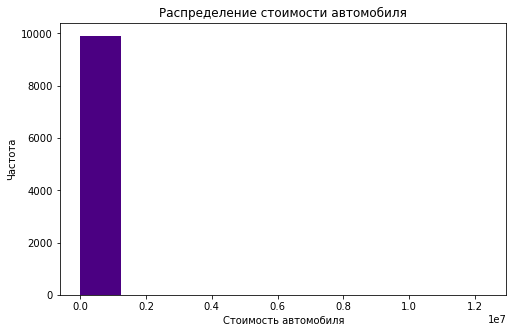

In [390]:
plt.figure(figsize=(8, 5))
plt.hist(df_new.price, color='indigo', bins=10)
plt.xlabel('Стоимость автомобиля')
plt.ylabel('Частота')
plt.title('Распределение стоимости автомобиля');

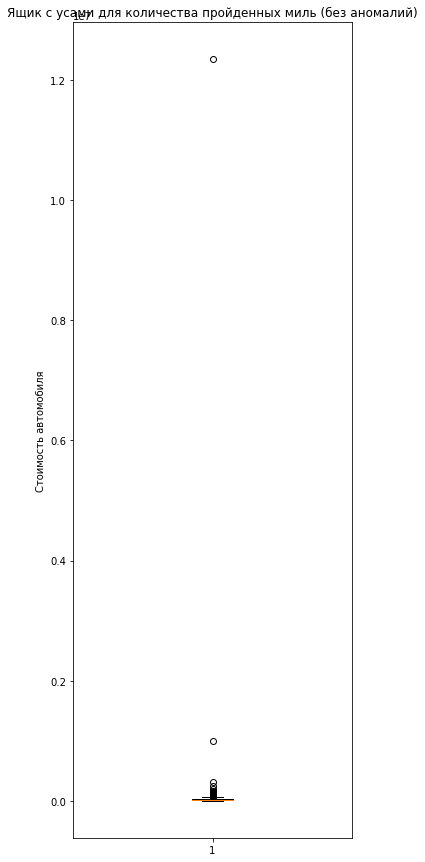

In [391]:
plt.figure(figsize=(5, 15))
plt.boxplot(df_new.price)
plt.ylabel('Стоимость автомобиля')
plt.title('Ящик с усами для количества пройденных миль (без аномалий)');

---

*Из «ящика с усами» можно увидеть, что выбросы действительно существуют, но из-за их большого разброса основаная часть графика («ящик») почти незаметна. Выведем описательные статистики стоимости автомобиля, чтобы изучить значения, обозначающие границы «ящика». С помощью apply(lambda x: f"{x:0.3f}") отобразите значения в удобном для восприятия виде.*

---

In [392]:
df_new.price.describe().apply(lambda x: f"{x:0.3f}")

count        9901.000
mean        20686.024
std        125240.560
min           500.000
25%          7880.000
50%         15595.000
75%         27990.000
max      12345678.000
Name: price, dtype: object

In [393]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

In [394]:
# Выведем границы для нормальных значений стоимости автомобиля, используя интерквартильный размах
boundaries = calculate_outliers(df_new.price)
boundaries

(-22285.0, 58155.0)

---

*Посчитаем и выведем количество выбросов в стоимости автомобиля.*

---

In [395]:
is_outlier = (df_new.price < boundaries[0]) | (df_new.price > boundaries[1]) 
is_outlier

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: price, Length: 9901, dtype: bool

In [396]:

is_outlier.sum() / len(df_new)*100
print(' Всего выбросов в датафрейме -', is_outlier.sum(),'\n',
     'Что составляет -', round(is_outlier.sum() / len(df_new)*100, 2), '%')

 Всего выбросов в датафрейме - 215 
 Что составляет - 2.17 %


---

*Выведем записи, в которых стоимость автомобиля попадает в выбросы, отсортированные по стоимости.*

*Посмотрим на данные и подумаем, могут ли данные*

*выбросы описывать особые значения категории цены или других признаков или действительно являются выбросами.*

---

In [397]:
df_is_outlier_sorted = df_new[is_outlier].sort_values(by='price', ascending=True)

In [398]:
df_new[is_outlier].sort_values(by='price', ascending=True)

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
946,7312212565,https://lasvegas.craigslist.org/cto/d/fresno-d...,las vegas,https://lasvegas.craigslist.org,58500,2013,ram,3500 limited,diesel,57149,clean,automatic,https://images.craigslist.org/00o0o_6VEbwgYoL0...,Only 57K Miles! This 3500 RAM Truck has the 6....,nv,36.746400,-119.639700,2021-04-24T20:46:06-0700,high,2021-04-25 03:46:06+00:00
4853,7308933629,https://omaha.craigslist.org/cto/d/cortland-20...,omaha / council bluffs,https://omaha.craigslist.org,58500,2008,chevrolet,corvette,gas,11000,clean,manual,https://images.craigslist.org/00P0P_kxzGxZwBY9...,2008 Corvette Z06 Wil Cooksey Edition Car nu...,ia,40.445488,-96.713695,2021-04-18T15:53:04-0500,high,2021-04-18 20:53:04+00:00
6060,7310551940,https://cincinnati.craigslist.org/ctd/d/camp-d...,cincinnati,https://cincinnati.craigslist.org,58500,2019,chevrolet,"silverado 2500hd 4wd crew cab 153.7"" ltz",other,50930,clean,automatic,https://images.craigslist.org/01010_ldls5xr3zz...,***Call Us for more information at: 513-453-41...,oh,39.171991,-84.271999,2021-04-21T17:05:31-0400,high,2021-04-21 21:05:31+00:00
8163,7307146509,https://lubbock.craigslist.org/ctd/d/brownfiel...,lubbock,https://lubbock.craigslist.org,58600,2019,ford,f-150,gas,29458,clean,automatic,https://images.craigslist.org/00E0E_6JF7CBAVf7...,Stanley CDJR Brownfield address: 1706 Lubbo...,tx,33.196047,-102.273565,2021-04-15T08:58:48-0500,high,2021-04-15 13:58:48+00:00
6725,7313502600,https://harrisburg.craigslist.org/ctd/d/salem-...,harrisburg,https://harrisburg.craigslist.org,58670,2016,chevrolet,es,other,16407,clean,automatic,https://images.craigslist.org/00000_e7iiMwUVq3...,2016 *** Chevrolet Corvette 2LZ Z06*** ...,pa,44.927304,-123.030322,2021-04-27T15:56:06-0400,high,2021-04-27 19:56:06+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6121,7315323093,https://daytona.craigslist.org/ctd/d/orlando-2...,daytona beach,https://daytona.craigslist.org,197999,2015,other,Lamborghini Huracan,gas,33875,clean,other,https://images.craigslist.org/01717_55Ai9omMq5...,CREDIT AMNESTY! SE HABLA ESPANOL !!OPEN SUNDA...,fl,28.466088,-81.396429,2021-05-01T11:48:44-0400,high,2021-05-01 15:48:44+00:00
292,7310897583,https://tucson.craigslist.org/ctd/d/tucson-201...,tucson,https://tucson.craigslist.org,239995,2017,ferrari,488 gtb,gas,6012,clean,automatic,https://images.craigslist.org/00t0t_dN5Wr8nfOx...,2017 Ferrari 488 GTB Coupe2017 Ferrari 488 GTB...,az,32.236075,-110.878886,2021-04-22T09:38:59-0700,high,2021-04-22 16:38:59+00:00
5662,7313998757,https://winchester.craigslist.org/ctd/d/manass...,winchester,https://winchester.craigslist.org,304995,2021,porsche,911,gas,22,clean,automatic,https://images.craigslist.org/00r0r_gh2TnrNdSu...,2021 PORSCHE 911 Turbo Offered by: Insider...,va,38.762669,-77.461754,2021-04-28T15:49:25-0400,high,2021-04-28 19:49:25+00:00
9792,7305237859,https://delaware.craigslist.org/cto/d/delaware...,delaware,https://delaware.craigslist.org,1000000,2022,other,Any make any model,other,283466,clean,other,https://images.craigslist.org/00S0S_k3A68PVXRC...,We come to you and give you an easy quick tran...,de,39.572500,-75.595700,2021-04-11T13:51:42-0400,high,2021-04-11 17:51:42+00:00


---

*Выведем последние 15 записей в отсортированном ранее датафрейме с выбросами, чтобы изучить признаки для наиболее дорогих автомобилей.*

---

In [399]:
df_new[is_outlier].sort_values(by='price', ascending=True).tail(15)

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
4133,7311841843,https://albuquerque.craigslist.org/ctd/d/albuq...,albuquerque,https://albuquerque.craigslist.org,120000,2021,chevrolet,corvette c8 z51,gas,10,clean,automatic,https://images.craigslist.org/00z0z_99zXyVvNmm...,New arrival Z51 Call or text annamarie for d...,nm,35.081800,-106.648200,2021-04-24T08:38:45-0600,high,2021-04-24 14:38:45+00:00
1699,7303398175,https://pullman.craigslist.org/cto/d/pullman-6...,pullman / moscow,https://pullman.craigslist.org,123456,1963,other,cadvwrambuick,gas,283466,missing,other,https://images.craigslist.org/00i0i_5iBwIawLgG...,I have several cars to get rid of: A '65 Ramb...,id,46.735200,-117.172900,2021-04-07T15:57:23-0700,high,2021-04-07 22:57:23+00:00
9194,7308732637,https://evansville.craigslist.org/ctd/d/evansv...,evansville,https://evansville.craigslist.org,123456,2006,jeep,wrangler,gas,12345,clean,other,https://images.craigslist.org/00I0I_2IkqjY69Zq...,Very Nice TJ jeeps and a few LJ jeep wranglers...,in,38.025845,-87.596457,2021-04-18T09:55:42-0500,high,2021-04-18 14:55:42+00:00
3006,7308463617,https://jacksonville.craigslist.org/cto/d/pont...,jacksonville,https://jacksonville.craigslist.org,129000,2018,mercedes-benz,benz amg gt c,gas,4000,clean,automatic,https://images.craigslist.org/00C0C_bN8j4IcEqW...,Beautiful car in perfect condition. Very rare ...,fl,30.122300,-81.362700,2021-04-17T16:48:42-0400,high,2021-04-17 20:48:42+00:00
5149,7314445453,https://boston.craigslist.org/gbs/ctd/d/methue...,boston,https://boston.craigslist.org,129995,2007,ferrari,f430 spider,gas,12351,clean,manual,https://images.craigslist.org/00q0q_3DqREXHC0j...,2007 Ferrari F430 Spider 2dr Convertible O...,ma,42.756205,-71.210258,2021-04-29T14:45:08-0400,high,2021-04-29 18:45:08+00:00
6566,7312384300,https://orlando.craigslist.org/ctd/d/orlando-2...,orlando,https://orlando.craigslist.org,129999,2018,mercedes-benz,maybach s560,gas,6000,clean,automatic,https://images.craigslist.org/00u0u_fKyDNpMeQR...,"Serious/ready buyers, please call or text @ (4...",fl,28.463700,-81.394800,2021-04-25T12:58:01-0400,high,2021-04-25 16:58:01+00:00
9024,7314817013,https://sandiego.craigslist.org/csd/ctd/d/dall...,san diego,https://sandiego.craigslist.org,139950,2017,other,Mclaren 570GT W/ Upgrades,gas,13000,clean,automatic,https://images.craigslist.org/00N0N_2egaCVi4pq...,SPECIALTYEXOTICS.COMCALL/TXT 469-215-1902FREE ...,ca,32.790400,-96.804400,2021-04-30T08:20:20-0700,high,2021-04-30 15:20:20+00:00
4245,7316319465,https://portland.craigslist.org/clc/ctd/d/glad...,portland,https://portland.craigslist.org,149990,2015,mercedes-benz,sprinter 3500 airs,diesel,49291,clean,automatic,https://images.craigslist.org/00B0B_79v5I132cL...,2015 Mercedes-Benz Sprinter 3500 Airstream Int...,or,45.382346,-122.605132,2021-05-03T11:04:09-0700,high,2021-05-03 18:04:09+00:00
8840,7313664504,https://austin.craigslist.org/cto/d/austin-sup...,austin,https://austin.craigslist.org,150000,2006,other,Peterbilt 378,diesel,1234,clean,manual,https://images.craigslist.org/00v0v_ejAvqrK3iP...,Selling a Wonderful Super Dump! 2006 Peterbilt...,tx,30.364900,-97.682700,2021-04-27T21:01:28-0500,high,2021-04-28 02:01:28+00:00
9164,7306718413,https://desmoines.craigslist.org/ctd/d/portlan...,des moines,https://desmoines.craigslist.org,163540,2020,mercedes-benz,es,other,6318,clean,automatic,https://images.craigslist.org/00y0y_i26NvL7pZC...,2020 *** Mercedes-Benz G-Class G63 AMG*** ...,ia,45.494265,-122.579192,2021-04-14T11:26:24-0500,high,2021-04-14 16:26:24+00:00


In [400]:
df_new = df_new[(df_new['price'] > boundaries[0]) & (df_new['price'] < boundaries[1])]


In [401]:
df_new.price.describe().apply(lambda x: f"{x:0.3f}")

count     9686.000
mean     18089.144
std      12562.397
min        500.000
25%       7500.000
50%      15000.000
75%      26995.000
max      57999.000
Name: price, dtype: object

---

*Исследование зависимости стоимости автомобиля от года производства*

---

In [402]:
df_price_mean_per_year = df_new.groupby('year').price.mean().apply(lambda x: f"{x:0.2f}").to_frame(name='price_mean')
df_price_mean_per_year['year'] = df_price_mean_per_year.index
df_price_mean_per_year = df_price_mean_per_year.reindex(columns=['year', 'price_mean'])
df_price_mean_per_year.info() #при выполнении средние значения записались как строка
df_price_mean_per_year.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 1915 to 2022
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        89 non-null     int64 
 1   price_mean  89 non-null     object
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


year           int64
price_mean    object
dtype: object

In [403]:
#переводим строку в число
df_price_mean_per_year.price_mean = pd.to_numeric(df_price_mean_per_year.price_mean)
df_price_mean_per_year.dtypes

year            int64
price_mean    float64
dtype: object

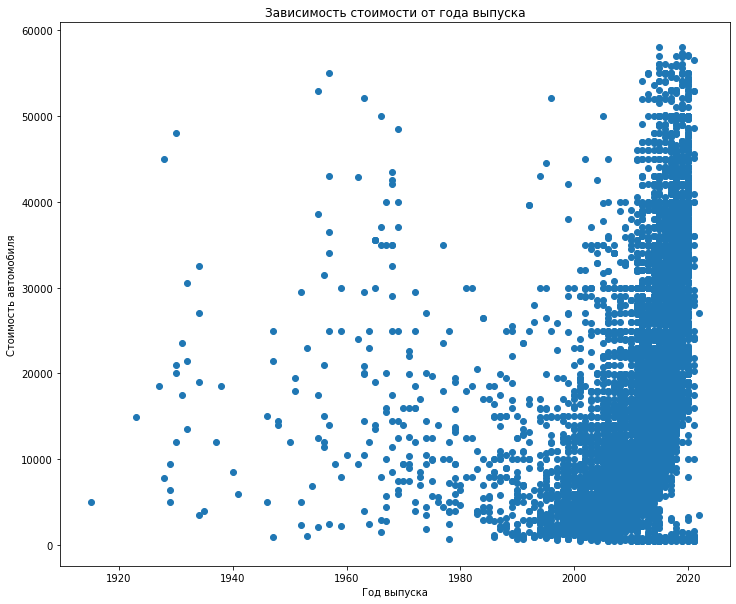

In [404]:
# Ваш код здесь
fig, ax = plt.subplots(figsize=(12, 10))
ax.scatter(x = df_new['year'], y = df_new['price'])
plt.xlabel("Год выпуска")
plt.ylabel("Стоимость автомобиля")
plt.title("Зависимость стоимости от года выпуска")
plt.show()


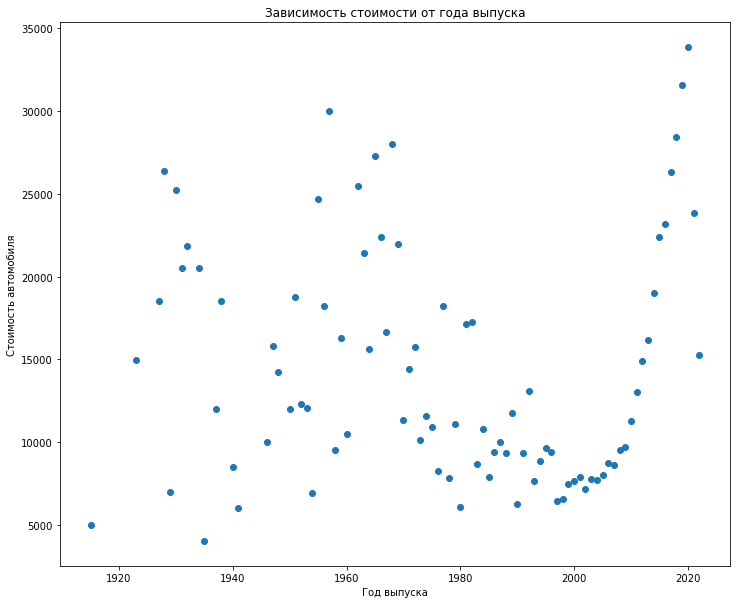

In [405]:

x = df_price_mean_per_year['year'].tolist()
y = df_price_mean_per_year['price_mean'].tolist()
fig, ax = plt.subplots(figsize=(12, 10))
ax.scatter(x, y)
plt.xlabel("Год выпуска")
plt.ylabel("Стоимость автомобиля")
plt.title("Зависимость стоимости от года выпуска")
plt.show()

In [406]:
# Ваш код здесь
df_avto_per_year = df_new.groupby(['year'], as_index=False)[['id']].count()
df_avto_per_year = df_avto_per_year.rename(columns={'id': 'count'})
df_avto_per_year

,year,count
0,1915,1
1,1923,1
2,1927,1
3,1928,2
4,1929,3
...,...,...
84,2018,779
85,2019,546
86,2020,389
87,2021,40


In [407]:
# Ваш код здесь
df_new_till_2021 = df_new[df_new['year'] < 2022]
df_new_till_2021.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


In [408]:
# Ваш код здесь
df_price_mean_per_year_till_2021 = df_new_till_2021.groupby('year').price.mean().apply(lambda x: f"{x:0.2f}").to_frame(name='price_mean') 
df_price_mean_per_year_till_2021['year'] = df_price_mean_per_year_till_2021.index
df_price_mean_per_year_till_2021 = df_price_mean_per_year_till_2021.reindex(columns=['year', 'price_mean'])

df_price_mean_per_year_till_2021.price_mean = pd.to_numeric(df_price_mean_per_year_till_2021.price_mean)

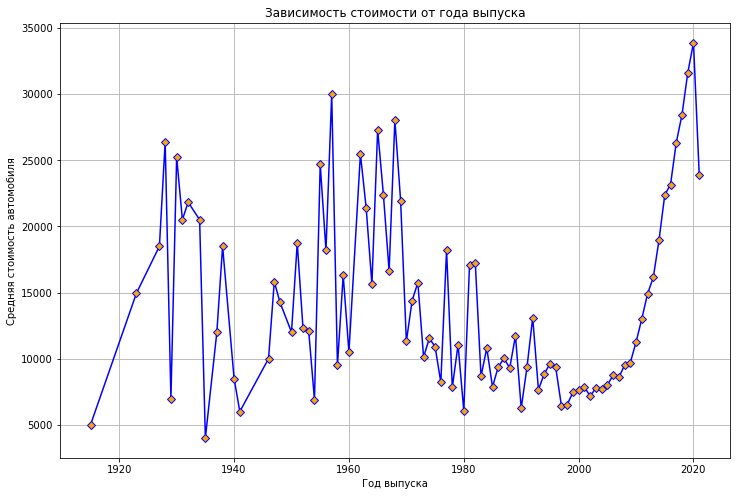

In [409]:
# Ваш код здесь

x = df_price_mean_per_year_till_2021.year
y = df_price_mean_per_year_till_2021.price_mean
plt.figure(figsize=(12, 8))
plt.plot(x, y, color = 'blue', marker = 'D', markerfacecolor = 'orange')
plt.xlabel("Год выпуска")
plt.ylabel("Средняя стоимость автомобиля")
plt.title("Зависимость стоимости от года выпуска")
plt.grid(True)
plt.show()

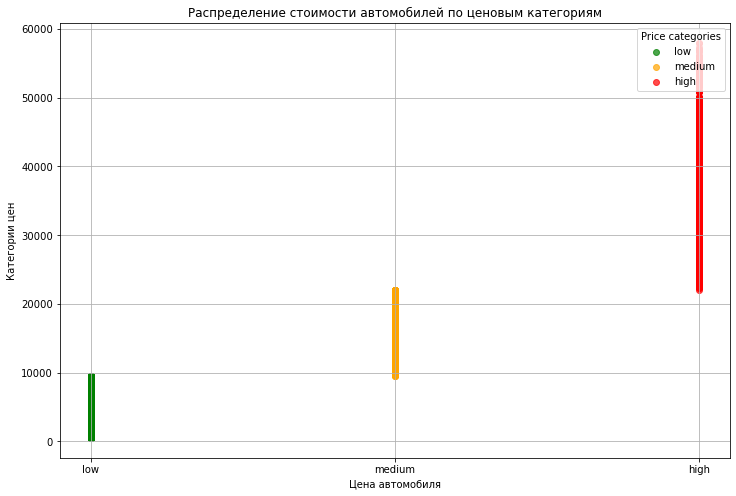

In [410]:


colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}
fig, ax = plt.subplots(figsize=(12, 8))
for price_category in colors:
    color = colors[price_category]
    data = df_new[df_new['price_category'] == price_category]

    ax.scatter(data['price_category'], data['price'], c=color, label=price_category, alpha=0.7)

ax.legend(loc='upper right', title="Price categories")
plt.title("Распределение стоимости автомобилей по ценовым категориям")
plt.xlabel('Цена автомобиля')
plt.ylabel('Категории цен')
plt.grid(True)
plt.show()

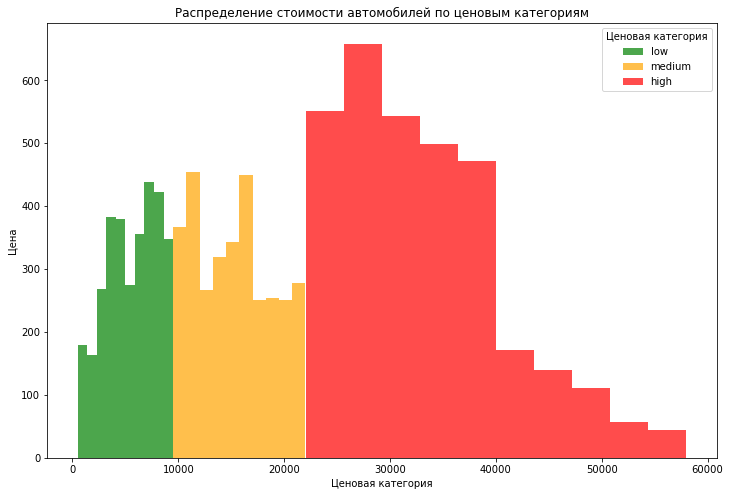

In [411]:
colors = {'low': 'green', 'medium': 'orange', 'high': 'red'} #Colors of price_category

fig, ax = plt.subplots(figsize=(12, 8))
for price_category in colors:
    color = colors[price_category]
    data = df_new[df_new['price_category'] == price_category]

    ax.hist(data['price'], color=color, alpha=0.7)
    
plt.ylabel('Цена')
plt.xlabel('Ценовая категория')
plt.title('Распределение стоимости автомобилей по ценовым категориям')
plt.legend(colors, title="Ценовая категория");

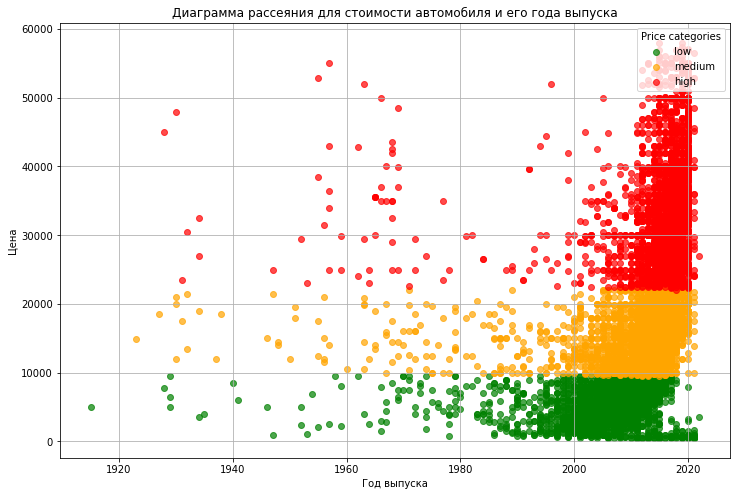

In [412]:
# Ваш код здесь
colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}
fig, ax = plt.subplots(figsize=(12, 8))
for price_category in colors:
    color = colors[price_category]
    data = df_new[df_new['price_category'] == price_category]

    ax.scatter(data['year'], data['price'], c=color, label=price_category, alpha=0.7)

ax.legend(loc='upper right', title="Price categories")
plt.title("Диаграмма рассеяния для стоимости автомобиля и его года выпуска")
plt.xlabel('Год выпуска')
plt.ylabel('Цена')
plt.grid(True)
plt.show()

In [413]:
# Ваш код здесь группирует df_new по 'manufacturer' и считает количество 'id' и переименовывает колонку  'id'
# as_index=False означает что 'manufacturer' не назначается индексом, 
# по умолчанию 'manufacturer' назначается индексом
# и сортировка в порядке убывания
df_manufacturer = df_new.groupby(['manufacturer'], 
                  as_index=False)[['id']].count().rename(columns={'id': 'count'}).sort_values(by='count',
                  ascending=False)

print('Всего производителей: ', len(df_manufacturer))

df_manufacturer


Всего производителей:  40


,manufacturer,count
12,ford,1564
6,chevrolet,1243
37,toyota,770
19,jeep,483
15,honda,460
28,nissan,452
32,ram,389
29,other,351
13,gmc,343
9,dodge,321


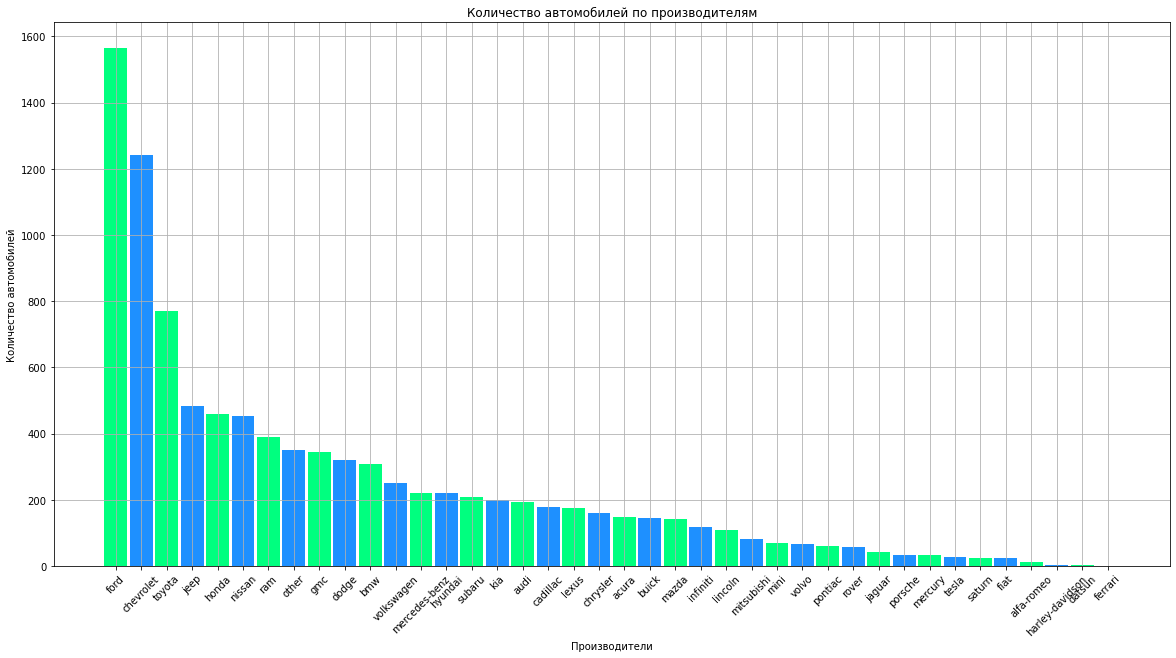

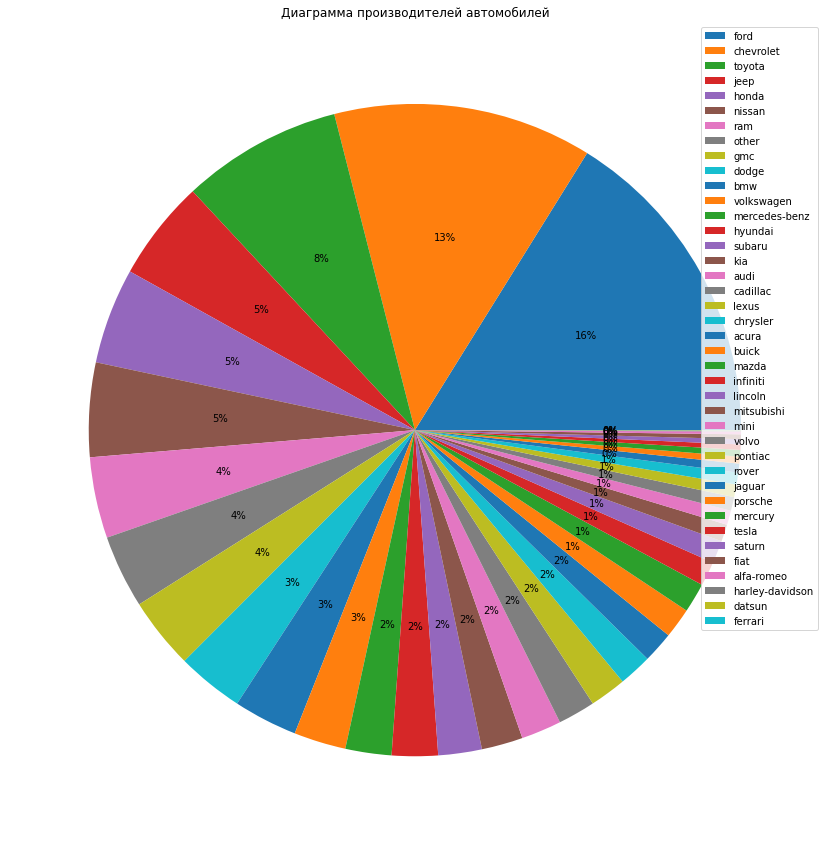

In [414]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=45)
plt.bar(df_manufacturer['manufacturer'], df_manufacturer['count'], 
        color=['springgreen', 'dodgerblue'], width = 0.9)
plt.grid(True)
plt.xlabel('Производители')
plt.ylabel('Количество автомобилей')
plt.title('Количество автомобилей по производителям');
# Ваш код здесь
plt.figure(figsize=(15, 15))
plt.pie(df_manufacturer['count'], labels=df_manufacturer['manufacturer'], labeldistance=None, autopct = '%1.0f%%')
plt.title("Диаграмма производителей автомобилей")
plt.legend(loc = 'upper right')
plt.show();

In [415]:
# Ваш код здесь
df_transmission = df_new.groupby(['transmission'], 
                  as_index=False)[['id']].count().rename(columns={'id': 'count'}).sort_values(by='count',
                  ascending=False)
df_transmission

,transmission,count
0,automatic,7425
2,other,1649
1,manual,612


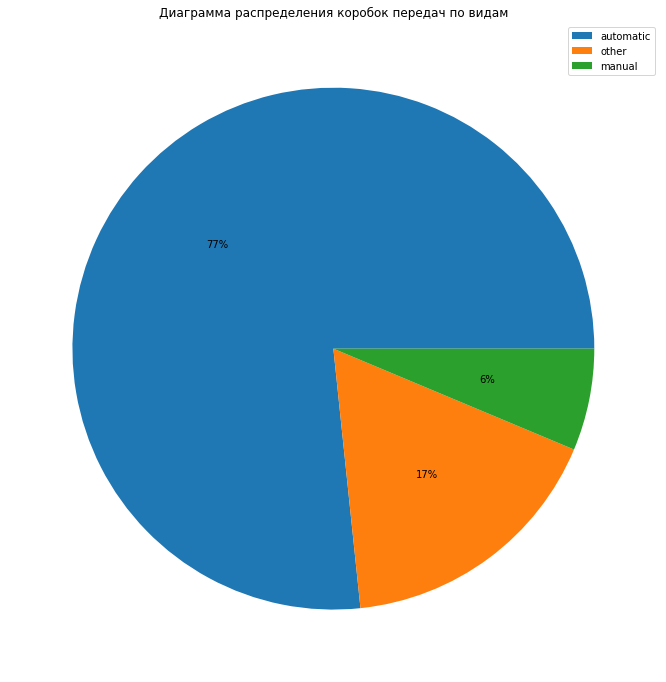

In [416]:
# Ваш код здесь
plt.figure(figsize=(12, 12))
plt.pie(df_transmission['count'], labels=df_transmission['transmission'], labeldistance=None, autopct = '%1.0f%%')
plt.title("Диаграмма распределения коробок передач по видам")
plt.legend(loc = 'upper right')
#plt.setp(autotexts, size=10, weight=700)
plt.show();

## 3. *Feature engineering*

Объявите блок Feature engineering. В этом блоке:
* подготовьте категориальные переменные с помощью OneHotEncoder;
* стандартизируйте и нормализуйте переменные, если нужно;
* создайте новые признаки на основе информации в датафрейме (на основе дат, текстовых значений переменных, и так далее);
* удалите неинформативные колонки, которые появились в датасете в результате Feature engineering;
* сформируйте финальный датасет, на котором будет производиться моделирование, и сохраните его в отдельный файл.

В решении данной задачи опирайтесь на результаты работы в 20 модуле блока Data Preparation. Исследование подкрепляйте соответствующей визуализацией в виде графиков, таблиц или матриц корреляций, если это нужно.

Декомпозируйте блок на подблоки.

####
---

*Построение признаков из строк*

---

In [417]:
df_new.columns


Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'odometer', 'title_status', 'transmission',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
       'price_category', 'date'],
      dtype='object')

In [418]:
# Выведем список значений и количество уникальных значений для модели автомобиля.
df_new.model.value_counts()

f-150                        146
silverado 1500               106
1500                         101
camry                         76
grand cherokee                72
                            ... 
g35 coupe                      1
c-max hybrid sel wagon 4d      1
grand caravan sport            1
Nascar                         1
a3 2.0t premium plus pzev      1
Name: model, Length: 3374, dtype: int64

---

*Количество уникальных значений велико. Попробуем их сократить, оставив только первое слово в наименовании модели. С помощью lambda-функции и преобразования над строками создайте новый признак short_model, содержащий только первое слово из наименования модели, выведите его и количество получившихся уникальных значений.*

---

In [419]:
# Ваш код здесь с помощью lambda
df_new['short_model'] = df_new.model.apply(lambda x: x.split()[0])
# Удалим model
#df_new = df_new.drop('model', axis = 1)
df_new.short_model.value_counts()


silverado    393
1500         207
wrangler     205
grand        203
f-150        198
            ... 
mercades       1
FRRV           1
blue           1
gx460          1
gs350          1
Name: short_model, Length: 963, dtype: int64

In [420]:
df_new.model.value_counts()

f-150                        146
silverado 1500               106
1500                         101
camry                         76
grand cherokee                72
                            ... 
g35 coupe                      1
c-max hybrid sel wagon 4d      1
grand caravan sport            1
Nascar                         1
a3 2.0t premium plus pzev      1
Name: model, Length: 3374, dtype: int64

####

---

*Создадим с помощью lambda-функции новый признак age_category, обозначающий возрастную категорию автомобиля, выведим его*

---

In [421]:
# 1

df_new['year'].describe()

count    9686.000000
mean     2010.836878
std         9.658486
min      1915.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

In [422]:
# 2

df_new['age_category'] =  df.apply(lambda x: "new" if x.year > 2013 else ("old" if x.year < 2006 else "average"), axis=1)
df_new['age_category']

0           new
1           new
2           new
3       average
4           new
         ...   
9995        old
9996    average
9997    average
9998        new
9999        new
Name: age_category, Length: 9686, dtype: object

In [423]:
# Выведем значения года выпуска автомобиля и получившуюся возрастную категорию автомобиля, чтобы убедиться в правильности распределения категорий

df_new[['year', 'age_category']]

,year,age_category
0,2020,new
1,2016,new
2,2017,new
3,2013,average
4,2021,new
...,...,...
9995,2002,old
9996,2008,average
9997,2011,average
9998,2015,new


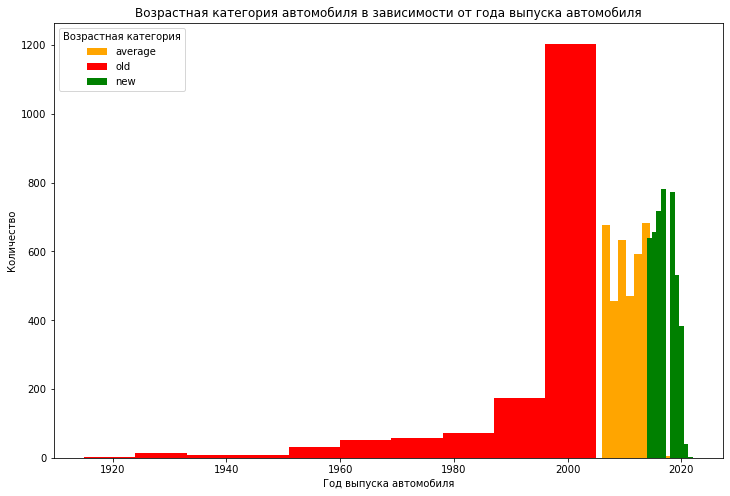

In [424]:
# На одном полотне построим графики распределения года производства автомобиля для каждой из 
# возрастной категории автомобиля. Настройти общий размер фигуры — 12x8, цвета в зависимости от 
# возрастной категории: зелёный, оранжевый и красный для новых, средних и старых автомобилей соответственно. 
# Не забудьте подписать название графика и оси, а также вывести легенду для возрастной категории.

colors = {'average': 'orange', 'old': 'red', 'new': 'green'}

fig, ax = plt.subplots(figsize=(12, 8))
for age_category in colors:
    color = colors[age_category]
    data = df_new[df_new['age_category'] == age_category]

    ax.hist(data['year'], color=color)
    
plt.ylabel('Количество')
plt.xlabel('Год выпуска автомобиля')
plt.title('Возрастная категория автомобиля в зависимости от года выпуска автомобиля')
plt.legend(colors, title="Возрастная категория");

####

---

*Создадим новый признак model_len, обозначающий количество символов (длину строки) в модели автомобиля, выведем его*

---

In [425]:
# 1

df_new['model_len'] = df_new.apply(lambda x: len(x.model) , axis=1)
df_new['model_len']

0       22
1       20
2       16
3        4
4        6
        ..
9995     4
9996     8
9997    25
9998     7
9999    22
Name: model_len, Length: 9686, dtype: int64

In [426]:
# С помощью value_counts посмотрим на самое популярное количество символов в модели автомобиля.

df_new['model_len'].value_counts()

6      1011
5       803
7       732
8       687
4       665
       ... 
187       1
168       1
58        1
76        1
186       1
Name: model_len, Length: 65, dtype: int64

In [427]:
# 3 Создадим новый признак model_word_count, обозначающий количество слов в модели автомобиля, выведите его.

df_new['model_word_count'] = df_new.apply(lambda x: len(x.model.split(' ')), axis=1)
df_new['model_word_count']

0       5
1       4
2       3
3       1
4       1
       ..
9995    1
9996    1
9997    5
9998    1
9999    5
Name: model_word_count, Length: 9686, dtype: int64

In [428]:
# 4 С помощью value_counts посмотрим на самое популярное количество слов в модели автомобиля.

df_new['model_word_count'].value_counts()

1     4310
2     2215
3     1365
4     1186
5      499
6       68
10       8
8        7
11       5
9        5
7        4
13       3
15       3
27       1
21       1
14       1
17       1
24       1
12       1
29       1
22       1
Name: model_word_count, dtype: int64

####
---

*Создадим несколько признаков из категориальной переменной*

---

In [429]:
# 1 Для каждого выбранного производителя автомобиля создайте отдельный признак, содержащий 1, 
# если данный автомобиль произведён именно этим производителем, и 0, если нет. Назовите признаки 
# согласно шаблону: для audi это будет is_audi и так далее.

df_manufacturer_all = df_manufacturer['manufacturer'].tolist()[:]


manufacturer_names = df_manufacturer_all#

for manufacturer in manufacturer_names:
    
    col_name = 'is_' + manufacturer

    df_new[col_name] = df_new.apply(lambda x: 1 if x.manufacturer == manufacturer else 0, axis=1)

In [430]:
# 2 Выведем последни колонки, для проверки правильности ввода

df_new.iloc[:, -42:]

,model_len,model_word_count,is_ford,is_chevrolet,is_toyota,is_jeep,is_honda,is_nissan,is_ram,is_other,...,is_jaguar,is_porsche,is_mercury,is_tesla,is_saturn,is_fiat,is_alfa-romeo,is_harley-davidson,is_datsun,is_ferrari
0,22,5,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,20,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,8,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,25,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,7,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [431]:
df_new.columns


Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'odometer', 'title_status', 'transmission',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
       'price_category', 'date', 'short_model', 'age_category', 'model_len',
       'model_word_count', 'is_ford', 'is_chevrolet', 'is_toyota', 'is_jeep',
       'is_honda', 'is_nissan', 'is_ram', 'is_other', 'is_gmc', 'is_dodge',
       'is_bmw', 'is_volkswagen', 'is_mercedes-benz', 'is_hyundai',
       'is_subaru', 'is_kia', 'is_audi', 'is_cadillac', 'is_lexus',
       'is_chrysler', 'is_acura', 'is_buick', 'is_mazda', 'is_infiniti',
       'is_lincoln', 'is_mitsubishi', 'is_mini', 'is_volvo', 'is_pontiac',
       'is_rover', 'is_jaguar', 'is_porsche', 'is_mercury', 'is_tesla',
       'is_saturn', 'is_fiat', 'is_alfa-romeo', 'is_harley-davidson',
       'is_datsun', 'is_ferrari'],
      dtype='object')

In [432]:
# Создадим новый признак odometer/price
df_new['odometer/price'] = df_new['odometer'] / df_new['price']
df_new[['odometer/price', 'odometer', 'price']]

,odometer/price,odometer,price
0,0.499036,27442,54990
1,3.542852,60023,16942
2,0.394718,14048,35590
3,8.089034,117291,14500
4,0.366972,8000,21800
...,...,...,...
9995,33.370412,150000,4495
9996,7.835323,113573,14495
9997,16.696387,150184,8995
9998,1.941787,61943,31900


####
---

*Преобразование категориальных переменных*

---

In [433]:
# Удалим признаки, которые нам не нужны будут для моделирования или из которых мы уже создали другие признаки
df_new = df_new.drop(['id', 'url', 'region_url', 'image_url', 'description', 'model'], axis=1) #df_marks = df_marks.drop(['algebra', 'chemistry'], axis=1)
df_new.columns

Index(['region', 'price', 'year', 'manufacturer', 'fuel', 'odometer',
       'title_status', 'transmission', 'state', 'lat', 'long', 'posting_date',
       'price_category', 'date', 'short_model', 'age_category', 'model_len',
       'model_word_count', 'is_ford', 'is_chevrolet', 'is_toyota', 'is_jeep',
       'is_honda', 'is_nissan', 'is_ram', 'is_other', 'is_gmc', 'is_dodge',
       'is_bmw', 'is_volkswagen', 'is_mercedes-benz', 'is_hyundai',
       'is_subaru', 'is_kia', 'is_audi', 'is_cadillac', 'is_lexus',
       'is_chrysler', 'is_acura', 'is_buick', 'is_mazda', 'is_infiniti',
       'is_lincoln', 'is_mitsubishi', 'is_mini', 'is_volvo', 'is_pontiac',
       'is_rover', 'is_jaguar', 'is_porsche', 'is_mercury', 'is_tesla',
       'is_saturn', 'is_fiat', 'is_alfa-romeo', 'is_harley-davidson',
       'is_datsun', 'is_ferrari', 'odometer/price'],
      dtype='object')

In [434]:
# Для категориальных переменных распечатаем наименование категории и количество уникальных значений в ней.
df_new[['region', 'manufacturer', 'fuel',
       'title_status', 'transmission', 'state', 'price_category', # 'short_model'
       'age_category']].nunique()

region            393
manufacturer       40
fuel                5
title_status        6
transmission        3
state              51
price_category      3
age_category        3
dtype: int64

In [435]:
# Создадим датафрейм data, содержащий только выбранные категориальные переменные.
data = df_new[['region', 'manufacturer', 'fuel',
       'title_status', 'transmission', 'state', 'price_category', # 'short_model',
       'age_category']]
data

,region,manufacturer,fuel,title_status,transmission,state,price_category,age_category
0,chattanooga,ram,diesel,clean,other,tn,high,new
1,north jersey,ford,other,clean,automatic,nj,medium,new
2,reno / tahoe,volkswagen,gas,clean,other,ca,high,new
3,fayetteville,toyota,gas,clean,automatic,nc,medium,average
4,new york city,nissan,gas,clean,automatic,ny,medium,new
...,...,...,...,...,...,...,...,...
9995,chautauqua,toyota,gas,clean,automatic,ny,low,old
9996,binghamton,jeep,gas,clean,other,ny,medium,average
9997,salem,audi,gas,clean,automatic,or,low,average
9998,madison,porsche,hybrid,clean,automatic,wi,high,new


---

*Чтобы не выхадила такая [ошибка](https://uzundemir.github.io///images/screenshot%2020_01_23_2.png) используем этот [совет](https://stackoverflow.com/questions/51521526/python-pandas-how-to-supress-performancewarning)*


---

In [436]:
# Создадим объект класса OneHotEncoder, который будет отвечать за преобразование. Уточните, что на выходе должна быть неразреженная матрица.
from sklearn.preprocessing import OneHotEncoder
#создание объекта OneHotEncoder
#sparse=False - указывает, что матрица не должна быть в разреженном формате, 
#то есть будет удобной для восприятия
ohe = OneHotEncoder(sparse=False)
ohe


OneHotEncoder(sparse=False)

In [437]:
# Идентифицируе параметры преобразования на датафрейме с категориальными переменными.
ohe.fit(data[['region', 'manufacturer', 'fuel',
       'title_status', 'transmission', 'state', 'price_category', #'short_model',
       'age_category']])

OneHotEncoder(sparse=False)

In [438]:
# Применим преобразование для датафрейма с категориальными переменными и сохраним в новую переменную, распечатаем получившуюся матрицу и её размерность.
ohe_data = ohe.transform(data[['region', 'manufacturer', 'fuel',
       'title_status', 'transmission', 'state', 'price_category', # 'short_model',
       'age_category']])
ohe_data


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [439]:
# Выведем новые наименования признаков с помощью метода get_feature_names_out.
ohe.get_feature_names()

array(['x0_SF bay area', 'x0_abilene', 'x0_akron / canton', 'x0_albany',
       'x0_albuquerque', 'x0_altoona-johnstown', 'x0_amarillo', 'x0_ames',
       'x0_anchorage / mat-su', 'x0_ann arbor', 'x0_annapolis',
       'x0_appleton-oshkosh-FDL', 'x0_asheville', 'x0_ashtabula',
       'x0_athens', 'x0_atlanta', 'x0_auburn', 'x0_augusta', 'x0_austin',
       'x0_bakersfield', 'x0_baltimore', 'x0_baton rouge',
       'x0_battle creek', 'x0_beaumont / port arthur', 'x0_bellingham',
       'x0_bemidji', 'x0_bend', 'x0_billings', 'x0_binghamton',
       'x0_birmingham', 'x0_bismarck', 'x0_bloomington',
       'x0_bloomington-normal', 'x0_boise', 'x0_boone', 'x0_boston',
       'x0_boulder', 'x0_bowling green', 'x0_bozeman', 'x0_brainerd',
       'x0_brownsville', 'x0_brunswick', 'x0_buffalo', 'x0_butte',
       'x0_cape cod / islands', 'x0_catskills', 'x0_cedar rapids',
       'x0_central NJ', 'x0_central louisiana', 'x0_central michigan',
       'x0_champaign urbana', 'x0_charleston', 'x0_c

---

*Добавим в исходный датафрейм получившиеся новые признаки, выведем первые пять записей датафрейма и список колонок.*


*Чтобы не выхадила такая [ошибка](https://uzundemir.github.io///images/screenshot%2020_01_23_2.png) используем этот [совет](https://stackoverflow.com/questions/51521526/python-pandas-how-to-supress-performancewarning)*


---

In [440]:
import warnings

warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [441]:
# Добавим в исходный датафрейм получившиеся новые признаки, выведем первые пять записей датафрейма и список колонок.
df_new[ohe.get_feature_names()] = ohe_data
print(df_new.columns)



Index(['region', 'price', 'year', 'manufacturer', 'fuel', 'odometer',
       'title_status', 'transmission', 'state', 'lat',
       ...
       'x5_wa', 'x5_wi', 'x5_wv', 'x5_wy', 'x6_high', 'x6_low', 'x6_medium',
       'x7_average', 'x7_new', 'x7_old'],
      dtype='object', length=563)


####

---

*Стандартизация данных*

---

In [442]:
# Создадим переменную под количественные переменные lat, long, year, odometer/price, desc_len, 
# model_in_desc, model_len, model_word_count и создайте датафрейм data, содержащий только выбранные количественные переменные.

quantitative_variables = ['lat', 'long', 'year', 'odometer/price', 'odometer',
                          'model_len', 'model_word_count']
data  = df_new[quantitative_variables]
data

,lat,long,year,odometer/price,odometer,model_len,model_word_count
0,35.060000,-85.250000,2020,0.499036,27442,22,5
1,40.821805,-74.061962,2016,3.542852,60023,20,4
2,33.779214,-84.411811,2017,0.394718,14048,16,3
3,35.715954,-78.655304,2013,8.089034,117291,4,1
4,40.654800,-73.609700,2021,0.366972,8000,6,1
...,...,...,...,...,...,...,...
9995,42.123900,-79.189500,2002,33.370412,150000,4,1
9996,43.216990,-77.755610,2008,7.835323,113573,8,1
9997,44.925908,-122.982753,2011,16.696387,150184,25,5
9998,43.029559,-89.397796,2015,1.941787,61943,7,1


In [443]:
# Создадим объект std_scaler класса StandardScaler с параметрами по умолчанию, который будет отвечать за стандартизацию.
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler

StandardScaler()

In [444]:
# Идентифицируем параметры преобразования на датафрейме с количественными переменными.
std_scaler.fit(data)

StandardScaler()

In [445]:
# Применим преобразование для датафрейма с количественными переменными и сохраните в новую переменную, распечатайте получившуюся матрицу и её размерность.
print('Среднее:', std_scaler.mean_)
print('Дисперсия', std_scaler.var_)
std_scaled = std_scaler.transform(data)
std_scaled.shape

Среднее: [ 3.85941198e+01 -9.39445220e+01  2.01083688e+03  1.48476929e+01
  9.46493917e+04  1.18961388e+01  2.16766467e+00]
Дисперсия [3.27713936e+01 3.19222603e+02 9.32767156e+01 7.97472611e+02
 3.96516742e+09 7.51254920e+01 2.18642500e+00]


(9686, 7)

In [446]:
# Создадим наименования новых признаков по шаблону: lat_std для lat и так далее. 
# 'lat', 'long', 'year', 'odometer/price',
# 'desc_len', 'model_in_desc', 'model_len', 'model_word_count'
std_quantitative_variables = ['std_lat', 'std_long', 'std_year', 'std_odometer/price',
               'std_odometer', 'std_model_len', 'std_model_word_count']

In [447]:
std_scaled.shape

(9686, 7)

In [448]:
data

,lat,long,year,odometer/price,odometer,model_len,model_word_count
0,35.060000,-85.250000,2020,0.499036,27442,22,5
1,40.821805,-74.061962,2016,3.542852,60023,20,4
2,33.779214,-84.411811,2017,0.394718,14048,16,3
3,35.715954,-78.655304,2013,8.089034,117291,4,1
4,40.654800,-73.609700,2021,0.366972,8000,6,1
...,...,...,...,...,...,...,...
9995,42.123900,-79.189500,2002,33.370412,150000,4,1
9996,43.216990,-77.755610,2008,7.835323,113573,8,1
9997,44.925908,-122.982753,2011,16.696387,150184,25,5
9998,43.029559,-89.397796,2015,1.941787,61943,7,1


In [449]:
std_quantitative_variables

['std_lat',
 'std_long',
 'std_year',
 'std_odometer/price',
 'std_odometer',
 'std_model_len',
 'std_model_word_count']

---

*В процессе выполнения последующей ячейки, появилось такое [сообщение](https://uzundemir.github.io///images/screenshot%2022_01_23_1.png), которое устраняется следующим [образом](https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas)*

---

In [450]:
pd.options.mode.chained_assignment = None  # default='warn'

In [451]:
# Добавим в исходный датафрейм получившиеся новые признаки, выведите первые пять записей датафрейма и список колонок.
data[std_quantitative_variables]  = std_scaled
data.head()


,lat,long,year,odometer/price,odometer,model_len,model_word_count,std_lat,std_long,std_year,std_odometer/price,std_odometer,std_model_len,std_model_word_count
0,35.060000,-85.250000,2020,0.499036,27442,22,5,-0.617353,0.486630,0.948761,-0.508105,-1.067299,1.165719,1.915479
1,40.821805,-74.061962,2016,3.542852,60023,20,4,0.389140,1.112821,0.534596,-0.400319,-0.549891,0.934971,1.239189
2,33.779214,-84.411811,2017,0.394718,14048,16,3,-0.841086,0.533543,0.638137,-0.511799,-1.280005,0.473477,0.562900
3,35.715954,-78.655304,2013,8.089034,117291,4,1,-0.502769,0.855733,0.223972,-0.239333,0.359564,-0.911006,-0.789679
4,40.654800,-73.609700,2021,0.366972,8000,6,1,0.359967,1.138134,1.052302,-0.512781,-1.376052,-0.680259,-0.789679


In [452]:
data.columns

Index(['lat', 'long', 'year', 'odometer/price', 'odometer', 'model_len',
       'model_word_count', 'std_lat', 'std_long', 'std_year',
       'std_odometer/price', 'std_odometer', 'std_model_len',
       'std_model_word_count'],
      dtype='object')

In [453]:
data = data.drop(['lat', 'long', 'year', 'odometer', 'model_len', 'model_word_count'], axis=1)

In [454]:
df_new

,region,price,year,manufacturer,fuel,odometer,title_status,transmission,state,lat,...,x5_wa,x5_wi,x5_wv,x5_wy,x6_high,x6_low,x6_medium,x7_average,x7_new,x7_old
0,chattanooga,54990,2020,ram,diesel,27442,clean,other,tn,35.060000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,north jersey,16942,2016,ford,other,60023,clean,automatic,nj,40.821805,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,reno / tahoe,35590,2017,volkswagen,gas,14048,clean,other,ca,33.779214,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,fayetteville,14500,2013,toyota,gas,117291,clean,automatic,nc,35.715954,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,new york city,21800,2021,nissan,gas,8000,clean,automatic,ny,40.654800,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chautauqua,4495,2002,toyota,gas,150000,clean,automatic,ny,42.123900,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9996,binghamton,14495,2008,jeep,gas,113573,clean,other,ny,43.216990,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9997,salem,8995,2011,audi,gas,150184,clean,automatic,or,44.925908,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9998,madison,31900,2015,porsche,hybrid,61943,clean,automatic,wi,43.029559,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [455]:
columns_for =['std_lat', 'std_long', 'std_year', 'std_odometer/price', 'std_odometer', 'std_model_len', 'std_model_word_count']
df_new[columns_for] = data[columns_for]

####
---

*MinMax-нормализация данных*

---

In [456]:
# Импортируем MinMaxScaler из sklearn.preprocessing.
#from sklearn.preprocessing import MinMaxScaler

In [457]:
# Создадим датафрейм, содержащий переменные lat и long.
#data_lat_long = data[['lat', 'long']]
#data_lat_long

In [458]:
#создаем объект scaler_mm класса MinMaxScaler() с параметрами по умолчанию
#scaler_mm = MinMaxScaler()

In [459]:
# Ваш код здесь
#scaler_mm.fit(data_lat_long)

In [460]:
#с помощью метода fit идентифицируем параметры сразу для двух признаков 'lat', 'long'
#scaled_mm = scaler_mm.transform(data_lat_long)
#scaled_mm.shape


In [461]:
#создаем переменную под количественные переменные lat, long
#mm_variables = ['lat_mm', 'long_mm']

In [462]:
#Проведем стандартизацию с помощью StandardScaler
#импортируем StandardScaler
#from sklearn.preprocessing import StandardScaler
#создаем объект std_scaler класса StandardScaler с параметрами по умолчанию
#std_scaler = StandardScaler()
#std_scaler

In [463]:
#с помощью метода fit идентифицируем параметры сразу для двух признаков 
#std_scaler.fit(data_lat_long)

In [464]:
#с помощью метода transform для признаков обработаем стандартизацию
#std_scaled = std_scaler.transform(data_lat_long)
#std_scaled.shape

In [465]:
#создаем переменную под количественные переменные lat, long
#std_variables = ['lat_std', 'long_std']

In [466]:
#Добавим признаки StandardScaler в новые колонки
#data_lat_long[std_variables]  = std_scaled
#data_lat_long.head()

In [467]:
#Добавим признаки MinMaxScaler в новые колонки
#data_lat_long[mm_variables]  = scaled_mm
#data_lat_long.head()

In [468]:
# Создадим переменную под географические признаки lat, lat_std, lat_mm, long, long_std, long_mm и выведите их. 
# Посмотрите на различия в значениях для исходных признаков и нормализованных с помощью стандартизации и MinMax-преобразования.
#all_variables = ['lat', 'lat_std', 'lat_mm', 'long', 'long_std', 'long_mm']
#data_lat_long[all_variables]

In [469]:
# Выведем описательные статистики для всех географических признаков. 
# Посмотрите на различия в статистиках для исходных признаков и нормализованных 
# с помощью стандартизации и MinMax-преобразования.
#all_variables = ['lat', 'lat_std', 'lat_mm', 'long', 'long_std', 'long_mm']
#data_lat_long[all_variables]

In [470]:
# Выведем матрицу корреляций для всех географических признаков, чтобы убедиться, что нормализация признаков сохранила свойства исходных признаков.
#import matplotlib.pyplot as plt

#fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))

#ax1.scatter(data_lat_long.lat, data_lat_long.long)
#ax1.set_title('Исходная')
#ax1.set_ylabel('Широта')
#ax1.set_xlabel('Долгота')

#ax2.scatter(data_lat_long.lat_std, data_lat_long.long_std)
#ax2.set_title('После Z-стандартизации')
#ax2.set_ylabel('Широта')
#ax2.set_xlabel('Долгота')

#ax3.scatter(data_lat_long.lat_mm, data_lat_long.long_mm)
#ax3.set_title('После Min-Max нормализации')
#ax3.set_ylabel('Широта')
#ax3.set_xlabel('Долгота')

#fig.suptitle('Сравнение исходных данных по широте и долготе с Z-стандартизованными и Min-Max нормализованными');

In [471]:
# Добавим в исходный датафрейм получившиеся признаки scaled_mm, выведем первые пять записей датафрейма и список колонок.
#data[mm_variables]  = scaled_mm
#data = data.drop(['lat', 'long'], axis=1)
#data.head()



####

---

*Признаки на основе дат*

---

In [472]:
df_new

,region,price,year,manufacturer,fuel,odometer,title_status,transmission,state,lat,...,x7_average,x7_new,x7_old,std_lat,std_long,std_year,std_odometer/price,std_odometer,std_model_len,std_model_word_count
0,chattanooga,54990,2020,ram,diesel,27442,clean,other,tn,35.060000,...,0.0,1.0,0.0,-0.617353,0.486630,0.948761,-0.508105,-1.067299,1.165719,1.915479
1,north jersey,16942,2016,ford,other,60023,clean,automatic,nj,40.821805,...,0.0,1.0,0.0,0.389140,1.112821,0.534596,-0.400319,-0.549891,0.934971,1.239189
2,reno / tahoe,35590,2017,volkswagen,gas,14048,clean,other,ca,33.779214,...,0.0,1.0,0.0,-0.841086,0.533543,0.638137,-0.511799,-1.280005,0.473477,0.562900
3,fayetteville,14500,2013,toyota,gas,117291,clean,automatic,nc,35.715954,...,1.0,0.0,0.0,-0.502769,0.855733,0.223972,-0.239333,0.359564,-0.911006,-0.789679
4,new york city,21800,2021,nissan,gas,8000,clean,automatic,ny,40.654800,...,0.0,1.0,0.0,0.359967,1.138134,1.052302,-0.512781,-1.376052,-0.680259,-0.789679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chautauqua,4495,2002,toyota,gas,150000,clean,automatic,ny,42.123900,...,0.0,0.0,1.0,0.616595,0.825835,-0.914981,0.655914,0.879006,-0.911006,-0.789679
9996,binghamton,14495,2008,jeep,gas,113573,clean,other,ny,43.216990,...,1.0,0.0,0.0,0.807540,0.906089,-0.293734,-0.248317,0.300520,-0.449511,-0.789679
9997,salem,8995,2011,audi,gas,150184,clean,automatic,or,44.925908,...,1.0,0.0,0.0,1.106061,-1.625262,0.016890,0.065465,0.881928,1.511839,1.915479
9998,madison,31900,2015,porsche,hybrid,61943,clean,automatic,wi,43.029559,...,0.0,1.0,0.0,0.774799,0.254479,0.431055,-0.457015,-0.519400,-0.564885,-0.789679


In [473]:
# Вывем столбцы с датами
df_new[['posting_date', 'date']]

,posting_date,date
0,2021-04-17T12:30:50-0400,2021-04-17 16:30:50+00:00
1,2021-05-03T15:40:21-0400,2021-05-03 19:40:21+00:00
2,2021-04-28T03:52:20-0700,2021-04-28 10:52:20+00:00
3,2021-04-17T10:08:57-0400,2021-04-17 14:08:57+00:00
4,2021-05-03T18:32:06-0400,2021-05-03 22:32:06+00:00
...,...,...
9995,2021-04-10T16:33:57-0400,2021-04-10 20:33:57+00:00
9996,2021-05-03T09:36:30-0400,2021-05-03 13:36:30+00:00
9997,2021-04-22T12:14:01-0700,2021-04-22 19:14:01+00:00
9998,2021-04-14T09:14:42-0500,2021-04-14 14:14:42+00:00


In [474]:
# Ваш код здесь
df_new['date'].dtype
#https://stackoverflow.com/questions/37561991/what-is-dtypeo-in-pandas

#Здесь я прочитал, что 

#When you see dtype('O') inside dataframe this means Pandas string.

datetime64[ns, UTC]

In [475]:
df_new['posting_date'].dtype

dtype('O')

In [476]:
# Создадим пустой датафрейм для признаков даты
df_date = pd.DataFrame()

In [477]:
df_new['posting_date'] = pd.to_datetime(df_new['posting_date'], errors='coerce', utc=True)
df_new['posting_date'].dtype

datetime64[ns, UTC]

In [478]:
# С помощью dt.month извлечем месяц и добавим признак в таблицу
df_date['month_of_advt'] = df_new['posting_date'].dt.month
df_date['month_of_advt']

0       4
1       5
2       4
3       4
4       5
       ..
9995    4
9996    5
9997    4
9998    4
9999    4
Name: month_of_advt, Length: 9686, dtype: int64

In [479]:
# С помощью dt.day извлечем день и добавим признак в таблицу
df_date['dayofweek'] = df_new['date'].dt.day
df_date['dayofweek']

0       17
1        3
2       28
3       17
4        3
        ..
9995    10
9996     3
9997    22
9998    14
9999    24
Name: dayofweek, Length: 9686, dtype: int64

In [480]:
# С помощью dt.hour извлечем час и добавим признак в таблицу
df_date['hour_of_advt'] = df_new['posting_date'].dt.hour
df_date['hour_of_advt']

0       16
1       19
2       10
3       14
4       22
        ..
9995    20
9996    13
9997    19
9998    14
9999    17
Name: hour_of_advt, Length: 9686, dtype: int64

In [481]:
# Создадим признак diff_years, обозначающий количество лет между годом производства автомобиля
# и годом размещения объявления о продаже автомобиля, и распечатайте его. Дополнительные корректировки не применяйте.
df_date['diff_years'] = df_new['date'].dt.year - df.year
df_date = df_date.astype({"diff_years": "Int64"}) # поменяем в float in int
df_date[['diff_years']]

,diff_years
0,1
1,5
2,4
3,8
4,0
...,...
9995,19
9996,13
9997,10
9998,6


In [482]:
df_date

,month_of_advt,dayofweek,hour_of_advt,diff_years
0,4,17,16,1
1,5,3,19,5
2,4,28,10,4
3,4,17,14,8
4,5,3,22,0
...,...,...,...,...
9995,4,10,20,19
9996,5,3,13,13
9997,4,22,19,10
9998,4,14,14,6


---

*Применим стандартизацию к новым признаками и сохраним результат в новые признаки вида month_std.*

---

In [483]:
#создаем объект std_scaler класса StandardScaler с параметрами по умолчанию
std_scaler = StandardScaler()
std_scaler

StandardScaler()

In [484]:
# с помощью метода fit идентифицируем параметры сразу для month_dayofweek_diff_years
std_scaler.fit(df_date)

StandardScaler()

In [485]:
#с помощью метода transform для признаков 'odometer', 'price' обработаем стандартизацию
#(Z-масштабирование)

std_scaled = std_scaler.transform(df_date)
std_scaled

array([[-0.61577811,  0.17099783,  0.16607321, -0.95060458],
       [ 1.62396158, -1.21055543,  0.67276738, -0.53658928],
       [-0.61577811,  1.25650397, -0.84731514, -0.64009311],
       ...,
       [-0.61577811,  0.66440971,  0.67276738, -0.01907016],
       [-0.61577811, -0.1250493 , -0.17172291, -0.43308546],
       [-0.61577811,  0.86177446,  0.33497127, -0.64009311]])

In [486]:
#Добавим их в новые колонки
df_new[['month_std', 'dayofweek_std', 'diff_years_std', 'hour_std' ]] = std_scaled
df_new

,region,price,year,manufacturer,fuel,odometer,title_status,transmission,state,lat,...,std_long,std_year,std_odometer/price,std_odometer,std_model_len,std_model_word_count,month_std,dayofweek_std,diff_years_std,hour_std
0,chattanooga,54990,2020,ram,diesel,27442,clean,other,tn,35.060000,...,0.486630,0.948761,-0.508105,-1.067299,1.165719,1.915479,-0.615778,0.170998,0.166073,-0.950605
1,north jersey,16942,2016,ford,other,60023,clean,automatic,nj,40.821805,...,1.112821,0.534596,-0.400319,-0.549891,0.934971,1.239189,1.623962,-1.210555,0.672767,-0.536589
2,reno / tahoe,35590,2017,volkswagen,gas,14048,clean,other,ca,33.779214,...,0.533543,0.638137,-0.511799,-1.280005,0.473477,0.562900,-0.615778,1.256504,-0.847315,-0.640093
3,fayetteville,14500,2013,toyota,gas,117291,clean,automatic,nc,35.715954,...,0.855733,0.223972,-0.239333,0.359564,-0.911006,-0.789679,-0.615778,0.170998,-0.171723,-0.226078
4,new york city,21800,2021,nissan,gas,8000,clean,automatic,ny,40.654800,...,1.138134,1.052302,-0.512781,-1.376052,-0.680259,-0.789679,1.623962,-1.210555,1.179462,-1.054108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chautauqua,4495,2002,toyota,gas,150000,clean,automatic,ny,42.123900,...,0.825835,-0.914981,0.655914,0.879006,-0.911006,-0.789679,-0.615778,-0.519779,0.841665,0.912464
9996,binghamton,14495,2008,jeep,gas,113573,clean,other,ny,43.216990,...,0.906089,-0.293734,-0.248317,0.300520,-0.449511,-0.789679,1.623962,-1.210555,-0.340621,0.291441
9997,salem,8995,2011,audi,gas,150184,clean,automatic,or,44.925908,...,-1.625262,0.016890,0.065465,0.881928,1.511839,1.915479,-0.615778,0.664410,0.672767,-0.019070
9998,madison,31900,2015,porsche,hybrid,61943,clean,automatic,wi,43.029559,...,0.254479,0.431055,-0.457015,-0.519400,-0.564885,-0.789679,-0.615778,-0.125049,-0.171723,-0.433085


####

---

*Сохранение датафрейма для этапа моделирования*

---

In [487]:
# Удалим колонки, которые были исходными для формирования признаков, 
# а также новые признаки, которые были добавлены с целью обучения. 
# Сохраним новый датафрейм в переменную df_prepared
columns_for_drop = ['year', 'region', 'manufacturer',
                    'fuel', 'odometer', 'title_status', 'transmission',
                     'state', 'lat', 'long', 'posting_date', 'date', 'age_category', 'short_model']
                    
#df_new['Y_price_category'] = df_new['price_category']
df_new = df_new.drop(columns = columns_for_drop, axis=1)
df_new

,price,price_category,model_len,model_word_count,is_ford,is_chevrolet,is_toyota,is_jeep,is_honda,is_nissan,...,std_long,std_year,std_odometer/price,std_odometer,std_model_len,std_model_word_count,month_std,dayofweek_std,diff_years_std,hour_std
0,54990,high,22,5,0,0,0,0,0,0,...,0.486630,0.948761,-0.508105,-1.067299,1.165719,1.915479,-0.615778,0.170998,0.166073,-0.950605
1,16942,medium,20,4,1,0,0,0,0,0,...,1.112821,0.534596,-0.400319,-0.549891,0.934971,1.239189,1.623962,-1.210555,0.672767,-0.536589
2,35590,high,16,3,0,0,0,0,0,0,...,0.533543,0.638137,-0.511799,-1.280005,0.473477,0.562900,-0.615778,1.256504,-0.847315,-0.640093
3,14500,medium,4,1,0,0,1,0,0,0,...,0.855733,0.223972,-0.239333,0.359564,-0.911006,-0.789679,-0.615778,0.170998,-0.171723,-0.226078
4,21800,medium,6,1,0,0,0,0,0,1,...,1.138134,1.052302,-0.512781,-1.376052,-0.680259,-0.789679,1.623962,-1.210555,1.179462,-1.054108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4495,low,4,1,0,0,1,0,0,0,...,0.825835,-0.914981,0.655914,0.879006,-0.911006,-0.789679,-0.615778,-0.519779,0.841665,0.912464
9996,14495,medium,8,1,0,0,0,1,0,0,...,0.906089,-0.293734,-0.248317,0.300520,-0.449511,-0.789679,1.623962,-1.210555,-0.340621,0.291441
9997,8995,low,25,5,0,0,0,0,0,0,...,-1.625262,0.016890,0.065465,0.881928,1.511839,1.915479,-0.615778,0.664410,0.672767,-0.019070
9998,31900,high,7,1,0,0,0,0,0,0,...,0.254479,0.431055,-0.457015,-0.519400,-0.564885,-0.789679,-0.615778,-0.125049,-0.171723,-0.433085


In [488]:
df_new = df_new.drop(columns = ['model_len', 'model_word_count'], axis=1)

In [489]:
df_new.columns

Index(['price', 'price_category', 'is_ford', 'is_chevrolet', 'is_toyota',
       'is_jeep', 'is_honda', 'is_nissan', 'is_ram', 'is_other',
       ...
       'std_long', 'std_year', 'std_odometer/price', 'std_odometer',
       'std_model_len', 'std_model_word_count', 'month_std', 'dayofweek_std',
       'diff_years_std', 'hour_std'],
      dtype='object', length=558)

## 4. *Modelling*

Объявите блок Modelling. В этом блоке:
* сформируйте датасет для обучения; инициализируйте фичи и целевую переменную 
(`price_category`); положите их в соответствующие переменные;
* разделите данные на треин и тест;
* объявите три модели: логистическая регрессия, случайный лес и многослойный персептрон;
* поработайте с моделями: сделайте тюнинг параметров и выберите лучшую модель с помощью кросс-валидации на тренировочной выборке;
* по результатам кросс-валидации выберите лучшую модель;
* посчитайте значение метрики лучшей модели на тестовой выборке; убедитесь, что модель не переобучилась.

В решении данной задачи опирайтесь на результаты работы в 22-23 модулях блока Modelling. Исследование подкрепляйте соответствующей визуализацией в виде графиков, таблиц или матриц корреляций, если это нужно.

Декомпозируйте блок на подблоки, если это нужно.

### DecisionTreeClassifier



In [490]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPClassifier

In [491]:


df_prepared = df_new.copy()
df_prepared = df_prepared.drop(['price'], axis=1)

x = df_prepared.drop(['price_category'], axis=1)
y = df_prepared['price_category']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [492]:
# Повторим еще раз
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

---

*Датафрейм содержит ячейки с пропусками. Найдем их и удалим*

***

In [493]:
df_prepared[df_prepared.isnull().any(1)]

,price_category,is_ford,is_chevrolet,is_toyota,is_jeep,is_honda,is_nissan,is_ram,is_other,is_gmc,...,std_long,std_year,std_odometer/price,std_odometer,std_model_len,std_model_word_count,month_std,dayofweek_std,diff_years_std,hour_std
344,high,0,0,0,0,0,0,0,1,0,...,-1.476271,0.845220,-0.512445,-1.288581,-1.026379,-0.789679,-0.615778,-0.618461,-0.340621,NaN
425,high,0,0,0,0,0,0,0,1,0,...,-0.618694,0.845220,-0.525759,-1.502764,0.127356,-0.113390,1.623962,-1.309238,-1.354009,NaN
702,high,0,0,0,0,0,0,0,1,0,...,0.403668,0.845220,-0.452158,-0.562230,0.819598,0.562900,1.623962,-1.210555,-0.002825,NaN
1005,high,0,0,0,0,0,0,0,1,0,...,-0.618694,0.845220,-0.525757,-1.502764,0.127356,-0.113390,-0.615778,-0.125049,0.166073,NaN
1217,high,0,0,0,0,0,0,0,1,0,...,0.650666,0.845220,-0.463209,-0.802314,-0.911006,-0.789679,-0.615778,0.467045,0.503869,NaN
1319,high,0,0,0,0,0,0,0,1,0,...,-0.618694,0.741679,-0.493469,-0.809095,-0.449511,-0.113390,-0.615778,1.256504,0.166073,NaN
1845,high,0,0,0,0,0,0,0,1,0,...,0.728164,0.948761,-0.525216,-1.494093,0.588851,0.562900,-0.615778,-0.815826,1.010563,NaN
2292,high,0,0,0,0,0,0,0,1,0,...,0.398891,0.845220,-0.470129,-0.757547,-0.564885,-0.113390,-0.615778,0.861774,-1.016213,NaN
2504,high,0,0,0,0,0,0,0,1,0,...,-0.618694,0.845220,-0.525759,-1.502764,0.127356,-0.113390,1.623962,-1.309238,-1.354009,NaN
2819,high,0,0,0,0,0,0,0,1,0,...,-0.106768,0.845220,-0.521073,-1.441941,-0.795632,-0.789679,-0.615778,0.565727,-0.509519,NaN


In [494]:
# обучение по одному из признаков чтобы найти какой столбец проблемный, подсказка https://web.telegram.org/z/#860323634
#j = 1
#for i in x_train.columns:
#    try:
#       clf = DecisionTreeClassifier (random_state=42)
#        print('success!', i, j)
#        j += 1
#        clf.fit(x_train[i], y_train)
#    except:
#        print(i)

In [495]:
# Создадим список индексов строк для удаления 
row_nan_for_drop = df_prepared[df_prepared.isnull().any(1)].index.tolist ()

In [496]:
# Удалим строки NaN
df_prepared = df_prepared.drop(index=row_nan_for_drop)

In [497]:
x = df_prepared.drop(['price_category'], axis=1)
y = df_prepared['price_category']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [498]:
# Повторим еще раз
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [499]:
predicted_train = clf.predict(x_train)
predicted_test = clf.predict(x_test)

In [500]:
print(accuracy_score(y_train, predicted_train))
print(accuracy_score(y_test, predicted_test))

1.0
1.0


In [510]:
x = df_prepared.drop('price_category', axis=1)

In [513]:
x_train

,is_ford,is_chevrolet,is_toyota,is_jeep,is_honda,is_nissan,is_ram,is_other,is_gmc,is_dodge,...,std_long,std_year,std_odometer/price,std_odometer,std_model_len,std_model_word_count,month_std,dayofweek_std,diff_years_std,hour_std
1292,0,0,0,0,0,0,0,0,0,0,...,-1.369970,-0.500816,0.299757,1.069574,1.396466,1.239189,-0.615778,0.763092,0.166073,0.498449
9925,0,1,0,0,0,0,0,0,0,0,...,-1.390583,-0.604358,-0.253034,0.331630,-0.334138,-0.789679,1.623962,-1.309238,-0.171723,0.601953
5331,0,1,0,0,0,0,0,0,0,0,...,0.474541,0.223972,-0.302067,0.402585,0.704224,0.562900,-0.615778,-0.125049,1.010563,-0.226078
9428,0,0,0,0,0,0,0,0,0,0,...,0.770341,0.327514,-0.108792,-0.381270,-0.795632,-0.789679,1.623962,-1.210555,-0.002825,-0.329582
569,0,0,0,0,0,0,0,0,0,0,...,0.428981,0.638137,-0.485937,-0.956563,1.165719,1.239189,-0.615778,-0.125049,0.503869,-0.640093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5928,0,0,0,0,1,0,0,0,0,0,...,0.468160,0.741679,-0.481074,-1.002109,0.588851,1.239189,1.623962,-1.309238,0.166073,-0.743597
5365,0,0,0,1,0,0,0,0,0,0,...,0.591853,0.638137,-0.482443,-1.005794,1.742586,1.239189,-0.615778,1.157822,0.672767,-0.640093
5574,0,0,0,0,0,0,0,0,0,0,...,-1.249185,-0.707899,1.128657,1.090028,-0.795632,-0.789679,-0.615778,-0.815826,-2.198500,0.705457
890,0,0,0,0,0,0,0,0,0,0,...,0.182714,0.741679,-0.520127,-1.410402,1.281092,1.239189,-0.615778,-0.421096,-0.509519,-0.743597


In [638]:
xx = df_prepared.drop(['price_category'], axis=1)
y = df_prepared['price_category']



In [645]:
xx

,is_ford,is_chevrolet,is_toyota,is_jeep,is_honda,is_nissan,is_ram,is_other,is_gmc,is_dodge,...,std_long,std_year,std_odometer/price,std_odometer,std_model_len,std_model_word_count,month_std,dayofweek_std,diff_years_std,hour_std
0,0,0,0,0,0,0,1,0,0,0,...,0.486630,0.948761,-0.508105,-1.067299,1.165719,1.915479,-0.615778,0.170998,0.166073,-0.950605
1,1,0,0,0,0,0,0,0,0,0,...,1.112821,0.534596,-0.400319,-0.549891,0.934971,1.239189,1.623962,-1.210555,0.672767,-0.536589
2,0,0,0,0,0,0,0,0,0,0,...,0.533543,0.638137,-0.511799,-1.280005,0.473477,0.562900,-0.615778,1.256504,-0.847315,-0.640093
3,0,0,1,0,0,0,0,0,0,0,...,0.855733,0.223972,-0.239333,0.359564,-0.911006,-0.789679,-0.615778,0.170998,-0.171723,-0.226078
4,0,0,0,0,0,1,0,0,0,0,...,1.138134,1.052302,-0.512781,-1.376052,-0.680259,-0.789679,1.623962,-1.210555,1.179462,-1.054108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,0,0,0,...,0.825835,-0.914981,0.655914,0.879006,-0.911006,-0.789679,-0.615778,-0.519779,0.841665,0.912464
9996,0,0,0,1,0,0,0,0,0,0,...,0.906089,-0.293734,-0.248317,0.300520,-0.449511,-0.789679,1.623962,-1.210555,-0.340621,0.291441
9997,0,0,0,0,0,0,0,0,0,0,...,-1.625262,0.016890,0.065465,0.881928,1.511839,1.915479,-0.615778,0.664410,0.672767,-0.019070
9998,0,0,0,0,0,0,0,0,0,0,...,0.254479,0.431055,-0.457015,-0.519400,-0.564885,-0.789679,-0.615778,-0.125049,-0.171723,-0.433085


In [689]:
x = xx[['std_year', 'std_odometer', 'std_model_len', 'month_std', 'dayofweek_std', 'std_model_word_count', 'std_odometer/price']].copy()

In [690]:
x

,std_year,std_odometer,std_model_len,month_std,dayofweek_std,std_model_word_count,std_odometer/price
0,0.948761,-1.067299,1.165719,-0.615778,0.170998,1.915479,-0.508105
1,0.534596,-0.549891,0.934971,1.623962,-1.210555,1.239189,-0.400319
2,0.638137,-1.280005,0.473477,-0.615778,1.256504,0.562900,-0.511799
3,0.223972,0.359564,-0.911006,-0.615778,0.170998,-0.789679,-0.239333
4,1.052302,-1.376052,-0.680259,1.623962,-1.210555,-0.789679,-0.512781
...,...,...,...,...,...,...,...
9995,-0.914981,0.879006,-0.911006,-0.615778,-0.519779,-0.789679,0.655914
9996,-0.293734,0.300520,-0.449511,1.623962,-1.210555,-0.789679,-0.248317
9997,0.016890,0.881928,1.511839,-0.615778,0.664410,1.915479,0.065465
9998,0.431055,-0.519400,-0.564885,-0.615778,-0.125049,-0.789679,-0.457015


In [691]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [692]:
# Повторим еще раз
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [693]:
predicted_train = clf.predict(x_train)
predicted_test = clf.predict(x_test)

In [694]:
print(accuracy_score(y_train, predicted_train))
print(accuracy_score(y_test, predicted_test))

1.0
0.9624008278716799


In [514]:
# обучение по одному из признаков чтобы найти какой столбец проблемный, подсказка https://web.telegram.org/z/#860323634
j = 1
df_feature_tuning = xx
for i in df_feature_tuning.columns:
    try:
        clf = DecisionTreeClassifier (random_state=42)
        print('success!', i, j)
        j += 1
        clf.fit(x_train[i], y_train)
        predicted_train = clf.predict(x_train)
        predicted_test = clf.predict(x_test)
        
        print(accuracy_score(y_train, predicted_train))
        print(accuracy_score(y_test, predicted_test))
        print('-------------------------------------')
        
    except:
        print(i)

success! std_odometer/price 1
std_odometer/price
success! std_year 2
std_year


In [518]:
clf = DecisionTreeClassifier (random_state=42)
print('success!', i, j)
j += 1
xx = x_train[['std_odometer/price', 'std_year','std_model_len']].copy()
clf.fit(xx, y_train)
predicted_train = clf.predict(x_train)
predicted_test = clf.predict(x_test)
print(accuracy_score(y_train, predicted_train))
print(accuracy_score(y_test, predicted_test))
print('-------------------------------------')

success! std_year 5


ValueError: X has 556 features, but DecisionTreeClassifier is expecting 3 features as input.

In [695]:
confusion_matrix(y_test, predicted_test)

array([[955,   4,  34],
       [  0, 893,  13],
       [ 34,  24, 942]], dtype=int64)

In [ ]:
df_prepared = df_prepared.drop('price_category', axis=1)

In [ ]:
df_prepared = df_prepared.drop('odometer/price', axis=1)

In [ ]:
df_prepared = pd.read_csv('data/vehicles_dataset_prepared.csv') 

In [ ]:
df_prepared = df_prepared.drop(['std_model_len', 'std_model_word_count'], axis=1)

In [ ]:
df_prepared = df_prepared.drop('hour_std', axis=1)

In [ ]:
df_prepared = df_prepared.drop('std_odometer', axis=1)

In [ ]:
df_prepared = df_prepared.drop(['std_lat',	'std_long',	'std_year',	'std_odometer/price',	'month_std',	'dayofweek_std',	'diff_years_std'], axis=1)

In [ ]:
df_prepared

In [658]:
# Повторим еще раз
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [659]:
predicted_train = clf.predict(x_train)
predicted_test = clf.predict(x_test)

In [660]:
print(accuracy_score(y_train, predicted_train))
print(accuracy_score(y_test, predicted_test))

1.0
0.5757157640565712


In [661]:
confusion_matrix(y_test, predicted_test)

array([[632,  91, 270],
       [ 82, 583, 241],
       [253, 293, 454]], dtype=int64)

### Random forest models

In [696]:
# Ваш код здесь 
# импортируем классификатор случайного леса
from sklearn.ensemble import RandomForestClassifier
# создаем отдельную переменную rf_clf для классификатора случайного леса
rf_clf = RandomForestClassifier(random_state=50)
# обучим эту переменную
rf_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=50)

In [697]:
# Ваш код здесь 
# выведем предсказанные моделью в predicted_train_rf и predicted_test_rf
predicted_train_rf = rf_clf.predict(x_train)
predicted_test_rf = rf_clf.predict(x_test)
# посчитаем доли правильно предугаданных значений
print(accuracy_score(y_train, predicted_train_rf))
print(accuracy_score(y_test, predicted_test_rf))

1.0
0.9434287685408762


In [698]:
# Ваш код здесь 
# создаем отдельную переменную rf_clf для классификатора случайного леса
rf_clf = RandomForestClassifier(random_state=50, n_estimators=200, min_samples_split=3,
                                max_depth=35, max_features='auto', min_samples_leaf=1,
                                bootstrap=False)
# обучим эту переменную
rf_clf.fit(x_train, y_train)
predicted_train_rf = rf_clf.predict(x_train)
predicted_test_rf = rf_clf.predict(x_test)
# посчитаем доли правильно предугаданных значений
print(accuracy_score(y_train, predicted_train_rf))
print(accuracy_score(y_test, predicted_test_rf))

1.0
0.9448085546740256


### LogisticRegression

In [665]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [666]:
df_for_log = df_prepared

In [620]:
# Ваш код подготовки данных здесь. Допишите инициализацию входных фичей и целевую переменную
x = df_for_log.drop(['price_category'], axis=1)
y = df_for_log['price_category']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)



In [621]:
# проверим, ести ли пропущенные значения в датасете
# команда any проверяет все записи по каждой колонке, если найдет хоть один пропуск - выдаст True
if_is_null = x.isnull().any().tolist()
for param in if_is_null:
    if param == True:
        print(param)

Все значения заполнены

In [699]:
# вызовем модуль логистической регрессии
logreg = LogisticRegression()
# обучим модель 
logreg.fit(x_train, y_train)

# найдем предикт на тестовых данных и выведим метрику точности модели
logreg_pred = logreg.predict(x_test)
accuracy_score(y_test, logreg_pred)


0.8999655053466713

In [700]:
# выведем матрицу ошибок
confusion_matrix(y_test, logreg_pred)

array([[964,   3,  26],
       [ 20, 860,  26],
       [204,  11, 785]], dtype=int64)

In [701]:
y.value_counts()

medium    3228
high      3222
low       3211
Name: price_category, dtype: int64

In [702]:
# вызовем модуль логистической регрессии  
# Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none']

logreg = LogisticRegression(C=1, 
                            max_iter=7,
                            multi_class='ovr', 
                            penalty='l1',
                            solver='liblinear'
                            )
    
# обучим модель 
logreg.fit(x_train, y_train)

# найдем предикт на тестовых данных и выведим метрику точности модели
logreg_pred = logreg.predict(x_test)
accuracy_score(y_test, logreg_pred)

C:\Users\HP Z2\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8130389789582615

In [703]:
# выведем матрицу ошибок
confusion_matrix(y_test, logreg_pred)

array([[856,   1, 136],
       [ 22, 861,  23],
       [330,  30, 640]], dtype=int64)

In [704]:
# найдем предикт на тестовых данных и выведим метрику точности модели
logreg_pred = logreg.predict(x_train)
accuracy_score(y_train, logreg_pred)

0.8102632357290742

### Multilayer perceptron

In [705]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state=42)

In [706]:
# обучим модель на примере одной переменной 
logreg = LogisticRegression(random_state=42)
logreg.fit(train_x, train_y)

pred = logreg.predict(test_x)
accuracy_score(test_y, pred)

0.8999655053466713

In [707]:
# обучим модель многослойный песептрон
mlp = MLPClassifier(random_state=42, max_iter=500)
mlp.fit(train_x, train_y)

MLPClassifier(max_iter=500, random_state=42)

In [708]:
# рассчитаем accuracy_score
pred_mlp = mlp.predict(test_x)
accuracy_score(test_y, pred_mlp)

0.9761986892031735

In [709]:
# изменим параметры персептрона
# hidden_layer_sizes=(100,20) 2 скрытых слоя 1 - 100, 2 - 20 нейронов
# activation = 'tanh' сменим на тангенс
mlp_tuned = MLPClassifier(random_state=42, max_iter=500, hidden_layer_sizes=(100,20), activation = 'tanh')
mlp_tuned.fit(train_x, train_y)

MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 20), max_iter=500,
              random_state=42)

In [710]:
# выведем предсказанные моделью в predicted_train и predicted_test
predicted_train = mlp.predict(train_x)
predicted_test = mlp.predict(test_x)
# посчитаем доли правильно предугаданных значений
print(accuracy_score(train_y, predicted_train))
print(accuracy_score(test_y, predicted_test))

0.986986098787341
0.9761986892031735


In [711]:
# рассчитаем accuracy_score
pred_mlp = mlp.predict(test_x)
accuracy_score(test_y, pred_mlp)

0.9761986892031735

### Сравнение моделей. Проверка качества

In [712]:
# Ваш код здесь
from sklearn.tree import DecisionTreeClassifier
df_r_f = df_prepared.copy()
#df_r_f.drop(['odometer/price_std', 'price'], axis= 1 , inplace= True)
# создаем датафрейм с фичами (x) и целевым признаком (y)
#x = df_r_f.drop(['price_category'], axis=1)
#y = df_r_f.price_category
# создаем тренировочный и тестируемый датасеты
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# обучаем модель на x_train, y_train
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
# выведем предсказанные моделью в predicted_train и predicted_test
predicted_train = clf.predict(x_train)
predicted_test = clf.predict(x_test)
# посчитаем доли правильно предугаданных значений
print(accuracy_score(y_train, predicted_train))
print(accuracy_score(y_test, predicted_test))

1.0
0.9620558813383926


In [713]:
# Ваш код здесь
from sklearn.ensemble import RandomForestClassifier
# создаем тренировочный и тестируемый датасеты
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# создаем отдельную переменную rf_clf для классификатора случайного леса
rf_clf = RandomForestClassifier()
# обучим эту переменную
rf_clf.fit(x_train, y_train)
# выведем предсказанные моделью в predicted_train_rf и predicted_test_rf
predicted_train_rf = rf_clf.predict(x_train)
predicted_test_rf = rf_clf.predict(x_test)
# посчитаем доли правильно предугаданных значений
print(accuracy_score(y_train, predicted_train_rf))
print(accuracy_score(y_test, predicted_test_rf))

1.0
0.9434287685408762


In [714]:
# Ваш код здесь
from sklearn.linear_model import LogisticRegression, LinearRegression
# создаем тренировочный и тестируемый датасеты

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# создаем отдельную переменную 
logreg = LogisticRegression(C=1, 
                            max_iter=7,
                            multi_class='ovr', 
                            penalty='l1',
                            solver='liblinear'
                            )
    
# обучим модель 
logreg.fit(x_train, y_train)


predicted_train_rf = logreg.predict(x_train)
predicted_test_rf = logreg.predict(x_test)
# посчитаем доли правильно предугаданных значений
print(accuracy_score(y_train, predicted_train_rf))
print(accuracy_score(y_test, predicted_test_rf))

0.818396923986986
0.8192480165574336


C:\Users\HP Z2\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


---

*Наиболее хорошо себя показала модель LogisticRegression которая показала accuracy_score = 0.755*

---



### Кросс-валидация


In [572]:
# инициализируем переиенную logreg для обучения модели логистической регрессии
logreg = LogisticRegression(random_state=42)

In [573]:
# импортируем функцию кросс-валидации
cross_validate(logreg, x, y, cv=5)# , scoring=)
# fit_time - время обучения модели для каждой итерации
# score_time - время оценки модели для каждой итерации
# test_score - значение метрики на тестовом фолде

C:\Users\HP Z2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP Z2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

{'fit_time': array([0.68540812, 0.68304825, 0.71638131, 0.68287897, 0.66653943]),
 'score_time': array([0.00503659, 0.        , 0.        , 0.        , 0.        ]),
 'test_score': array([1., 1., 1., 1., 1.])}

In [574]:
cv_score = cross_val_score(logreg, x, y, cv=5,)
cv_score

C:\Users\HP Z2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP Z2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([1., 1., 1., 1., 1.])

In [575]:
cv_score.mean(), cv_score.std()

(1.0, 0.0)

In [ ]:
# создаем отдельную переменную rf_clf для классификатора случайного леса
rf_clf = RandomForestClassifier()
# обучим эту переменную
rf_clf.fit(x_train, y_train)

In [ ]:
# импортируем функцию кросс-валидации
cross_validate(logreg, x, y, cv=5)# , scoring=)
# fit_time - время обучения модели для каждой итерации
# score_time - время оценки модели для каждой итерации
# test_score - значение метрики на тестовом фолде

In [ ]:
cv_score = cross_val_score(logreg, x, y, cv=5,)
cv_score

## 4. *Results*

Объявите блок Results. В этом блоке:

* подведите итог: какая модель показала себя лучше всего и будет финальным результатом данного ноутбука;
* обучите эту модель на всём датасете;
* сохраните обученную модель в `pickle`.

## Как отправить работу на проверку


Отправьте куратору на проверку финальный ноутбук проекта, а также файл обученной модели в формате `pickle`.